ML / 데이터 분석 프로젝트 1

***목차***

*   Library 불러오기
*   데이터 선정
*   문제 설정 및 과제 설계
*   데이터 탐색 및 분석
*   데이터 전처리
*   Baseline 모델 실험
*   모델 튜닝 및 최종 모델 선정



***Library*** 불러오기

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



**데이터 선정**

Synthetic Employee Attrition Dataset는 직원 이직을 분석하고 예측하기 위해 설계된 시뮬레이션 데이터셋이다. 이 데이터셋은 직원의 프로필과 관련된 다양한 정보를 포함하며, 이직에 영향을 미치는 요인들을 이해하고 분석할 수 있도록 구성되어 있다. 총 74,498개의 샘플로 이루어져 있으며, 모델 개발과 평가를 위해 훈련 세트와 테스트 세트로 나뉘어 있다.

데이터의 출처는 Kaggle이다.
https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset

**문제 설정 및 전체적인 과제 설계**

본 프로젝트의 목표는 직원 이직에 영향을 미치는 요인들을 분석하고, 이직 가능성이 높은 직원을 예측할 수 있는 모델을 개발하는 것이다.


이 문제를 해결하기 위해 지도학습을 기반으로 한 분류 모델을 사용할 수 있다. 입력 데이터로는 직원의 나이, 근속연수, 월급, 직무 만족도 등 다양한 특성을 포함하며, 출력 값으로는 이직 여부(0: 남음, 1: 떠남)를 예측한다. 모델 개발 과정에서는 훈련 데이터를 활용해 모델을 학습시키고, 테스트 데이터를 이용해 모델의 성능을 평가한다.

본 프로젝트를 위해 지도학습을 기반으로 한 분류 모델을 사용할 수 있다. 입력 데이터로는 직원의 나이, 근속연수, 월급, 직무 만족도 등 다양한 특성을 포함하며, 출력 값으로는 이직 여부(0: 남음, 1: 떠남)를 예측한다. 모델 개발 과정에서는 훈련 데이터를 활용해 모델을 학습시키고, 테스트 데이터를 이용해 모델의 성능을 평가한다. 최종적으로는 직원 이직 예측에 대한 정확도를 높여 기업 혹은 조직의 HR 전략에 도움이 되는 것이 목표이다.

현재 HR 분석에서는 로지스틱 회귀, 랜덤 포레스트, 그래디언트 부스팅 머신(GBM), 그리고 신경망 등 다양한 기계학습 모델이 이직 예측에 사용되고 있다. 또한, SHAP(SHapley Additive exPlanations)와 같은 특성 중요도 분석 도구를 통해 이직에 영향을 미치는 주요 요인을 파악하는 방법도 많이 사용된다.

이 문제는 지도학습에 기반한 분류 문제로 정의할 수 있다. 목표는 직원의 이직 여부(이진 클래스)를 예측하는 것이다. 또한, 비지도학습을 활용해 직원들을 이직 위험 수준별로 군집화하거나, 특정 특성에 따라 데이터를 분류하는 방법도 적용할 수 있다. 회귀 분석은 연속형 데이터를 예측할 때 적합하지만, 이 데이터셋의 주요 목표는 이진 분류이므로 분류 모델이 더 적합하다.

모델 성능은 정확도(Accuracy), 정밀도(Precision), 재현율(Recall)을 기준으로 측정할 수 있다.

정확도(Accuracy): 전체 샘플 중에서 올바르게 예측된 비율을 의미한다. 데이터의 클래스가 불균형하지 않을 경우 유용하다.


정밀도(Precision): 이직으로 예측된 샘플 중 실제 이직한 샘플의 비율을 나타낸다. 이직 예측 시 잘못된 경고를 줄이는 데 중요하다.


재현율(Recall): 실제 이직한 샘플 중 올바르게 예측된 비율을 나타낸다. 이직 위험을 놓치지 않는 데 초점을 맞출 때 유용하다.

이 문제에서 필요한 최소한의 성능은 정확도 80% 이상, 정밀도와 재현율 75% 이상으로 설정할 수 있다. 이는 HR 전략 수립에 충분히 활용 가능하도록 모델의 신뢰도를 보장하는 기준이다.

**계획**



*   결측치는 존재하지 않기에 이에 관한 전처리는 수행하지 않는다.
*   연속형 변수 혹은 인코딩이 필요한 변수들에 대하여 전처리를 수행한다.
*   여러 모델들로 기초적인 성능 평가를 수행한다
*   좋은 성능에 모델에 대하여 파라미터 튜닝을 수행하고 그에 대하여 평가한다.
*   최종 모델을 선정하고 Test Set에 대하여 성능을 평가한다.








**데이터 탐색 및 분석**

총 23개의 feature와 1개의 타켓이 있으며, train과 test 데이터를 합하여 74,498개의 instance가 있다.

Train은 59598개, Test는 14900개있다.

### Features (특성)

- **Employee ID**: 각 직원에게 부여된 고유 식별자이다. (Integer)
- **Age**: 직원의 나이이며, 18세에서 60세 사이이다. (Integer)
- **Gender**: 직원의 성별이다. (Categorical: 'Male', 'Female')
- **Years at Company**: 직원이 회사에서 근무한 년수이다. (Integer)
- **Monthly Income**: 직원의 월급(달러 기준)이다. (Integer)
- **Job Role**: 직원이 근무하는 부서 또는 직무를 나타내며, 금융, 의료, 기술, 교육, 미디어 등으로 분류된다. (Categorical)
- **Work-Life Balance**: 직원이 느끼는 일과 생활의 균형 수준이다. (Categorical: 'Poor', 'Below Average', 'Good', 'Excellent')
- **Job Satisfaction**: 직원의 직무 만족도이다. (Categorical: 'Very Low', 'Low', 'Medium', 'High')
- **Performance Rating**: 직원의 성과 등급이다. (Categorical: 'Low', 'Below Average', 'Average', 'High')
- **Number of Promotions**: 직원이 받은 승진 횟수이다. (Integer)
- **Overtime**: 정규 근무 시간 외에 추가 근무(야근 또는 초과 근무) 여부이다. (Categorical: 'Yes', 'No')
- **Distance from Home**: 직원의 집과 직장 사이 거리(마일 단위)이다. (Integer)
- **Education Level**: 직원이 가진 최고 학력이다. (Categorical: 'High School', 'Associate Degree', 'Bachelor’s Degree', 'Master’s Degree', 'PhD')
- **Marital Status**: 직원의 결혼 상태이다. (Categorical: 'Divorced', 'Married', 'Single')
- **Number of Dependents**: 부양하고 있는 가족(의존자)의 수이다. (Integer)
- **Job Level**: 직원의 직급이다. (Categorical: 'Entry', 'Mid', 'Senior')
- **Company Size**: 직원이 근무하는 회사의 규모이다. (Categorical: 'Small', 'Medium', 'Large')
- **Company Tenure**: 직원이 산업 내에서 근무한 총 년수이다. (Integer)
- **Remote Work**: 직원이 원격 근무를 하는지 여부이다. (Categorical: 'Yes', 'No')
- **Leadership Opportunities**: 직원이 리더십 기회를 가졌는지 여부이다. (Categorical: 'Yes', 'No')
- **Innovation Opportunities**: 직원이 혁신 기회를 가졌는지 여부이다. (Categorical: 'Yes', 'No')
- **Company Reputation**: 직원이 느끼는 회사의 평판이다. (Categorical: 'Very Poor', 'Poor', 'Good', 'Excellent')
- **Employee Recognition**: 직원이 받은 인정의 수준이다. (Categorical: 'Very Low', 'Low', 'Medium', 'High')


### Target Variable (목표 변수)

- **Attrition**: 직원이 회사를 떠났는지 여부를 나타낸다. (Binary: 0, 1)



데이터셋이 train과 test로 나뉘어 있어, 두 데이터를 불러오고 하나의 데이터로 합쳐서 전처리를 진행하겠다.

전처리 이후. 미리 확인힌 train 데이터의 길이를 통해 다시 분리하고 train을 진행하겠다.

Train에 대하여 데이터 전처리를 진행하고, 후에 파이프라인을 형성해 최종 모델 성능 평가시 test 데이터에 적용하여 예측하도록 하겠다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 파일 경로
file_path1 = '/content/drive/My Drive/DataSet/train.csv'
file_path2 = '/content/drive/My Drive/DataSet/test.csv'

# 데이터 불러오기
data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)

print(len(data1))

data = pd.concat([data1, data2], axis=0, ignore_index=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
59598


In [ ]:
# 데이터 요약
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

In [ ]:
# 통계 요약
print(data.describe())

        Employee ID           Age  Years at Company  Monthly Income  \
count  74498.000000  74498.000000      74498.000000    74498.000000   
mean   37249.500000     38.529746         15.721603     7299.379514   
std    21505.864514     12.083456         11.223744     2152.508566   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18625.250000     28.000000          7.000000     5652.000000   
50%    37249.500000     39.000000         13.000000     7348.000000   
75%    55873.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    16149.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74498.000000        74498.000000          74498.000000   
mean               0.832935           49.991584              1.650326   
std                0.995289           28.513611              1.553633   
min                0.000000            1.000000              0.00000

In [ ]:
print(data.describe(include = 'O'))

       Gender    Job Role Work-Life Balance Job Satisfaction  \
count   74498       74498             74498            74498   
unique      2           5                 4                4   
top      Male  Technology              Good             High   
freq    40826       19322             28158            37245   

       Performance Rating Overtime    Education Level Marital Status  \
count               74498    74498              74498          74498   
unique                  4        2                  5              3   
top               Average       No  Bachelor’s Degree        Married   
freq                44719    50157              22331          37419   

       Job Level Company Size Remote Work Leadership Opportunities  \
count      74498        74498       74498                    74498   
unique         3            3           2                        2   
top        Entry       Medium          No                       No   
freq       29780        37231       60

In [ ]:
# 데이터의 첫 몇 줄 확인
print(data.head())

   Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Siz

결측치 검사 결과, 결측치가 존재하지 않으니 추후 결측치에 대한 전처리는 하지 않는다.

In [ ]:
# 결측치 확인
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64


In [ ]:
missing_percentage = (missing_values / len(data)) * 100
print(f"Missing data percentage:\n{missing_percentage}")

Missing data percentage:
Employee ID                 0.0
Age                         0.0
Gender                      0.0
Years at Company            0.0
Job Role                    0.0
Monthly Income              0.0
Work-Life Balance           0.0
Job Satisfaction            0.0
Performance Rating          0.0
Number of Promotions        0.0
Overtime                    0.0
Distance from Home          0.0
Education Level             0.0
Marital Status              0.0
Number of Dependents        0.0
Job Level                   0.0
Company Size                0.0
Company Tenure              0.0
Remote Work                 0.0
Leadership Opportunities    0.0
Innovation Opportunities    0.0
Company Reputation          0.0
Employee Recognition        0.0
Attrition                   0.0
dtype: float64


수치형 변수들에 대하여 IQR 방식으로 이상치 탐지를 진행하였다.

진행 결과, 'Years at Company'와 'Monthly Income'에서 이상치가 탐지 되었다. 전처리 과정에서 처리할 계획을 세웠다.

In [ ]:
numeric_columns = data.select_dtypes(include=['number']).columns

# 이상치 탐지 및 처리 함수
def detect_and_clip_outliers(df, numeric_columns):
    # 이상치 정보를 담을 딕셔너리
    outlier_info = {}

    for col in numeric_columns:
        # 각 수치형 변수의 IQR 계산
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # IQR에 기반한 lower bound와 upper bound 계산
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 이상치 탐지: 해당 컬럼의 값이 lower_bound보다 작거나 upper_bound보다 큰 경우
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # 이상치 정보 저장
        outlier_info[col] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outliers_count': len(outliers),
            'outliers_percentage': len(outliers) / len(df) * 100
        }

    return outlier_info

# 이상치 탐지
outlier_info = detect_and_clip_outliers(data, numeric_columns)

# 이상치 정보 출력
for col, info in outlier_info.items():
    print(f"Column: {col}")
    print(f"  Lower Bound: {info['lower_bound']}")
    print(f"  Upper Bound: {info['upper_bound']}")
    print(f"  Number of Outliers: {info['outliers_count']}")
    print(f"  Outliers Percentage: {info['outliers_percentage']:.2f}%\n")

Column: Employee ID
  Lower Bound: -37247.5
  Upper Bound: 111746.5
  Number of Outliers: 0
  Outliers Percentage: 0.00%

Column: Age
  Lower Bound: -3.5
  Upper Bound: 80.5
  Number of Outliers: 0
  Outliers Percentage: 0.00%

Column: Years at Company
  Lower Bound: -17.0
  Upper Bound: 47.0
  Number of Outliers: 338
  Outliers Percentage: 0.45%

Column: Monthly Income
  Lower Bound: 816.0
  Upper Bound: 13712.0
  Number of Outliers: 65
  Outliers Percentage: 0.09%

Column: Number of Promotions
  Lower Bound: -3.0
  Upper Bound: 5.0
  Number of Outliers: 0
  Outliers Percentage: 0.00%

Column: Distance from Home
  Lower Bound: -50.0
  Upper Bound: 150.0
  Number of Outliers: 0
  Outliers Percentage: 0.00%

Column: Number of Dependents
  Lower Bound: -4.5
  Upper Bound: 7.5
  Number of Outliers: 0
  Outliers Percentage: 0.00%

Column: Company Tenure
  Lower Bound: -24.0
  Upper Bound: 136.0
  Number of Outliers: 0
  Outliers Percentage: 0.00%



타겟 변수의 분포를 시각화 하여 확인해보았다.



<ipython-input-11-6cedb21de78c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x="Attrition", palette="viridis")


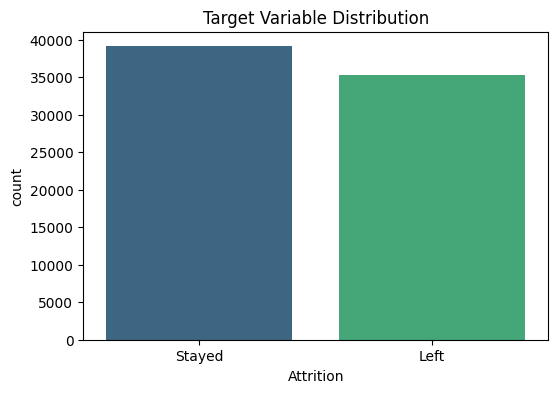

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data, x="Attrition", palette="viridis")
plt.title("Target Variable Distribution")
plt.show()

타켓 변수의 비율이 약 52%, 48% 이므로 클래스 데이터 불균형은 보이지 않는다고 할 수 있다.

In [ ]:
# 타겟 변수 비율
target_dist = data['Attrition'].value_counts(normalize=True)
print("Target Variable Proportion:\n", target_dist)

Target Variable Proportion:
 Attrition
Stayed    0.525222
Left      0.474778
Name: proportion, dtype: float64


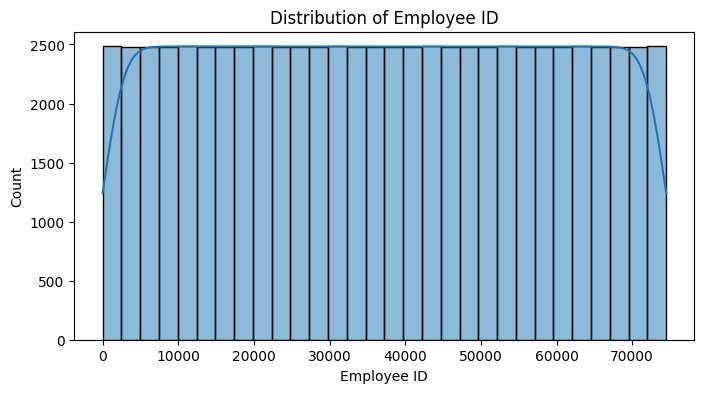

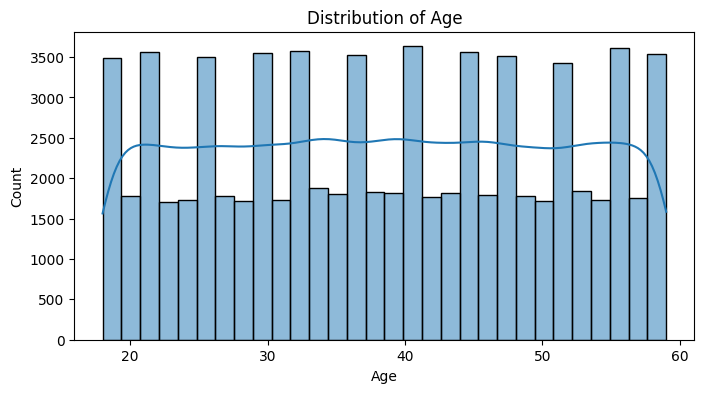

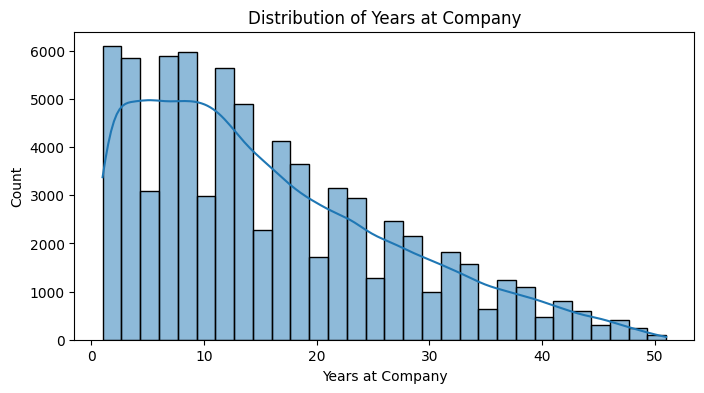

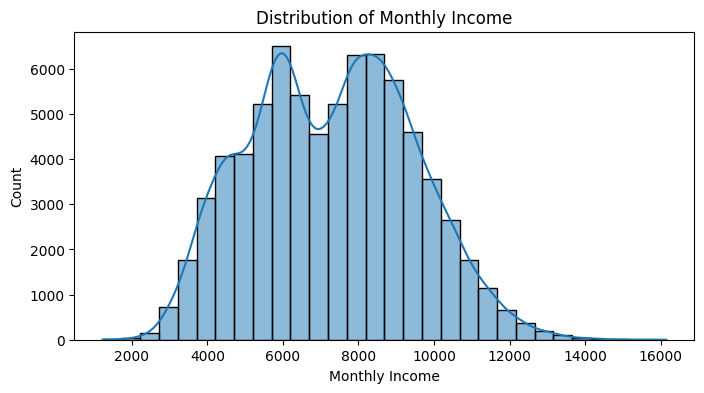

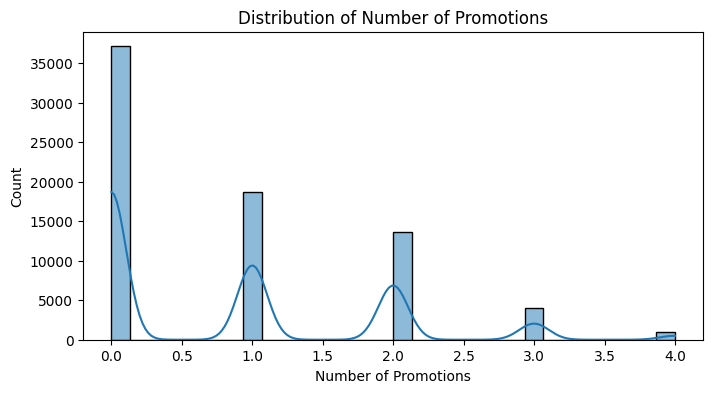

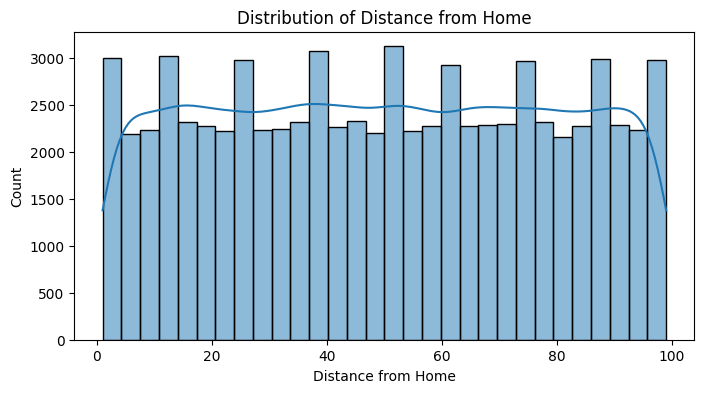

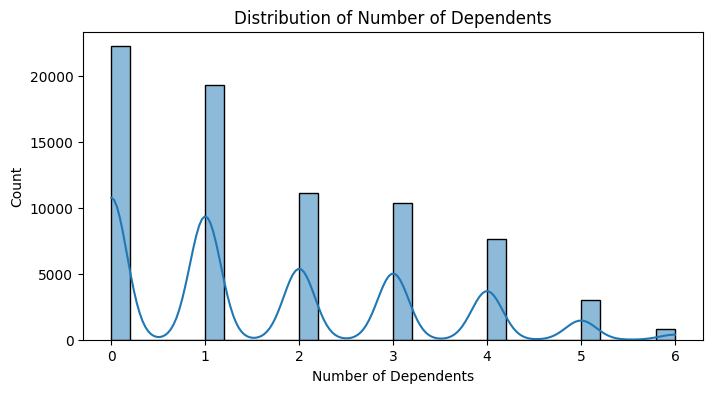

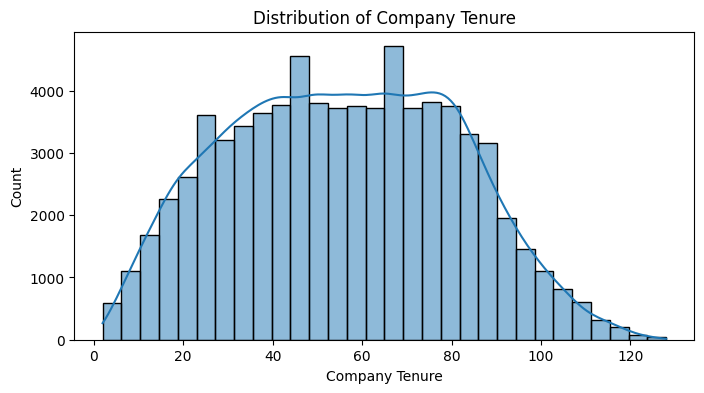

In [ ]:
# 수치형 변수 분포 시각화
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

Company Tenure와 Monthly Income의 경우 Bell Shape에 가까운 대칭적 데이터 분포를 확인할 수 있으며, Number of Dependents, Number of Promotions, Years at Compnay의 경우 왼쪽으로 치우친 음의 왜도(Skewness)를 확인할 수 있다.
그외에 수치 데이터들을 거의 일정하게 분포되었음을 시각적으로 확인할 수 있다.
수치형 자료들 간의 데이터 크기가 다르기에 전처리 과정에서 표준화 스케일링을 진행하겠다.

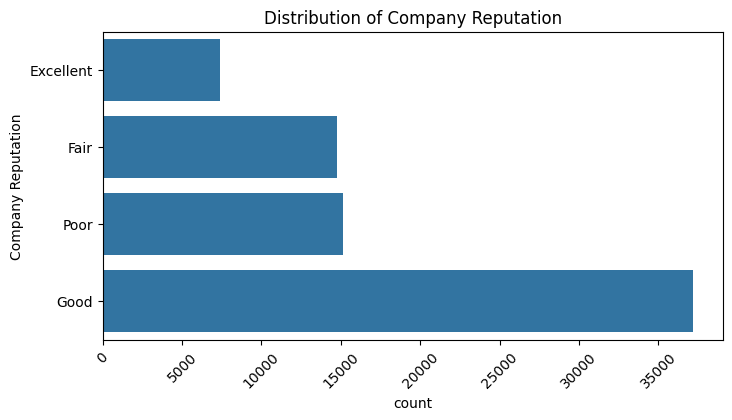

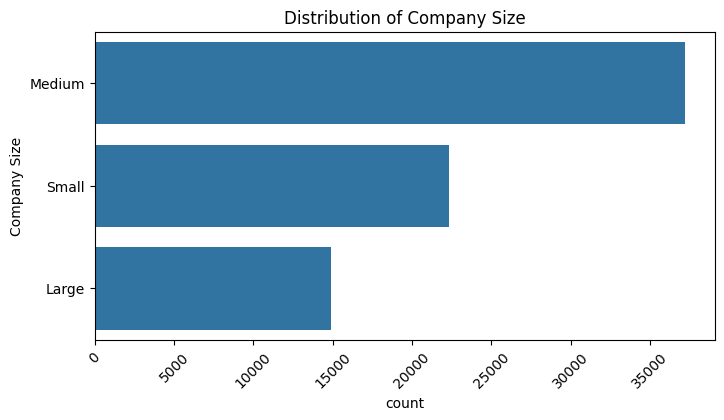

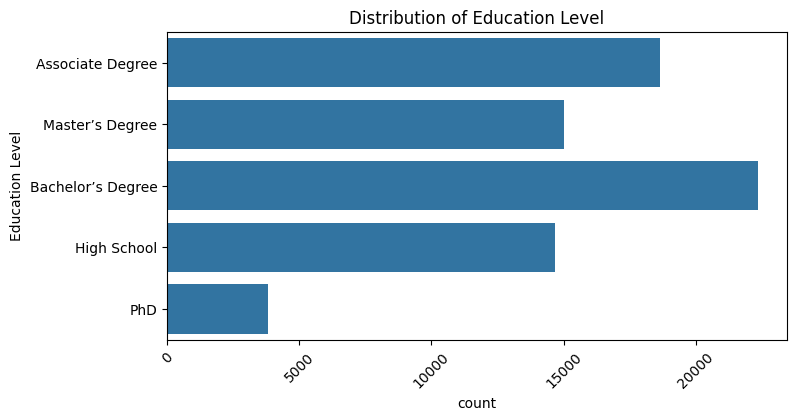

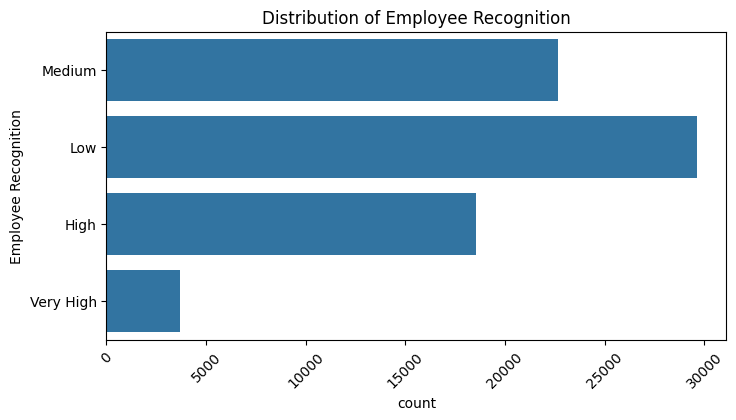

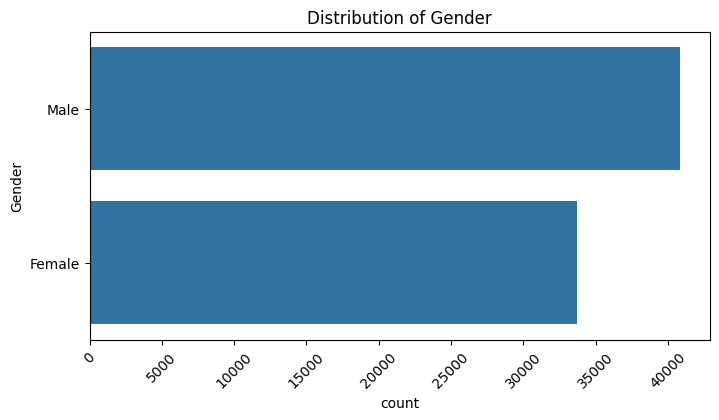

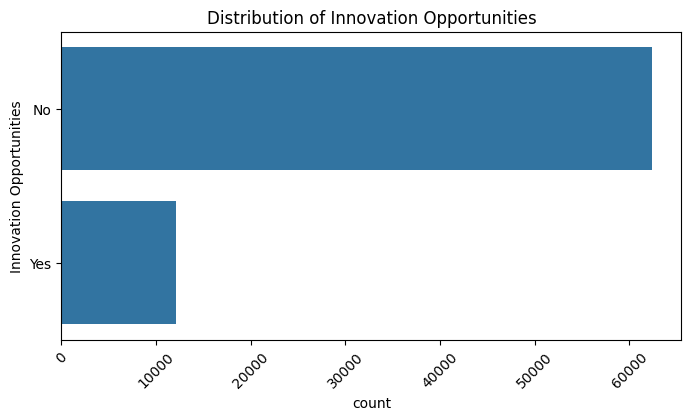

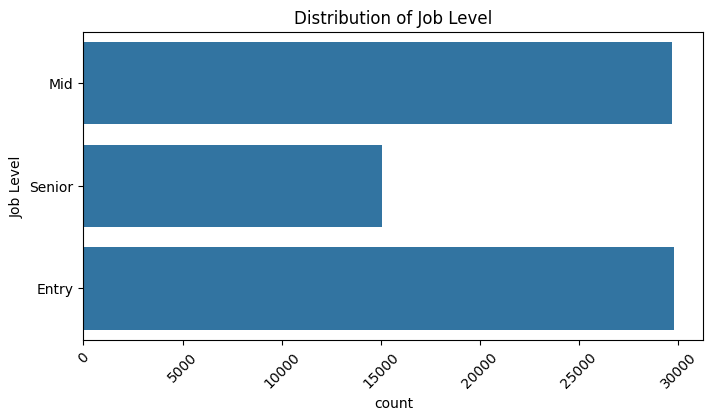

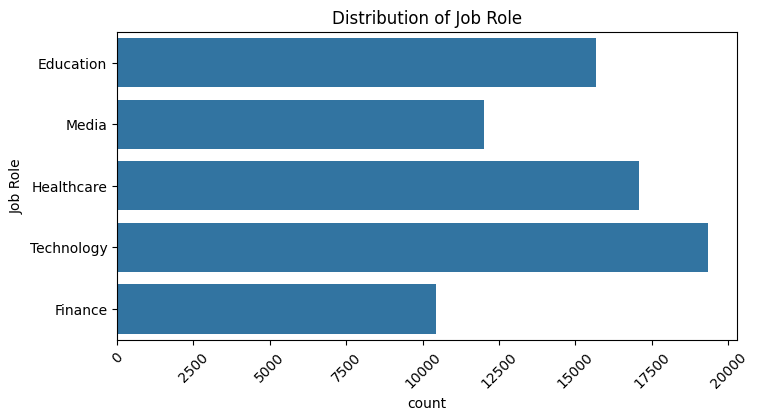

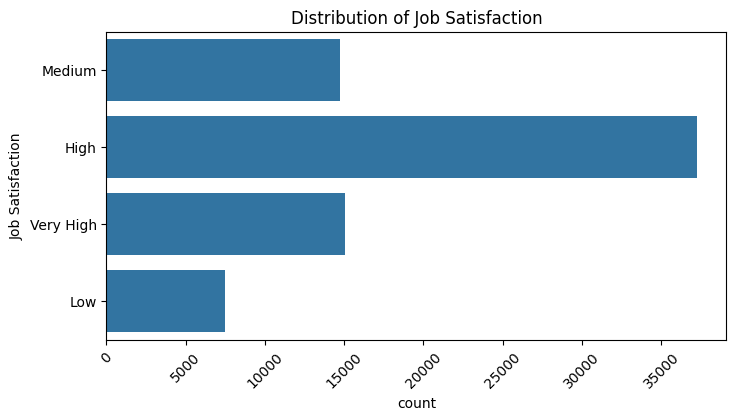

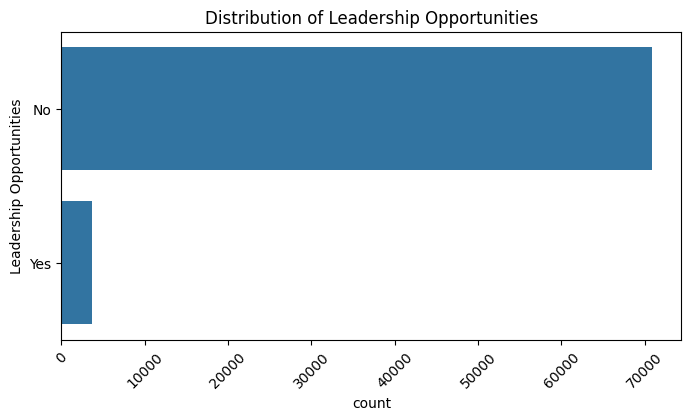

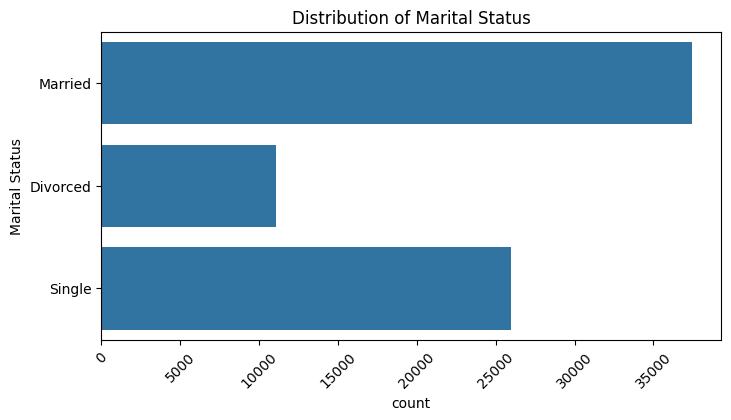

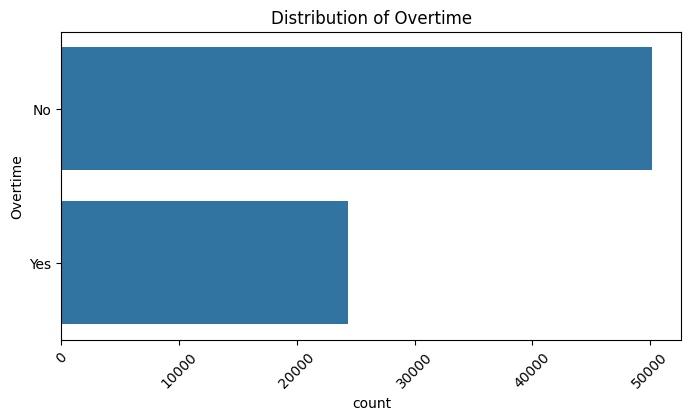

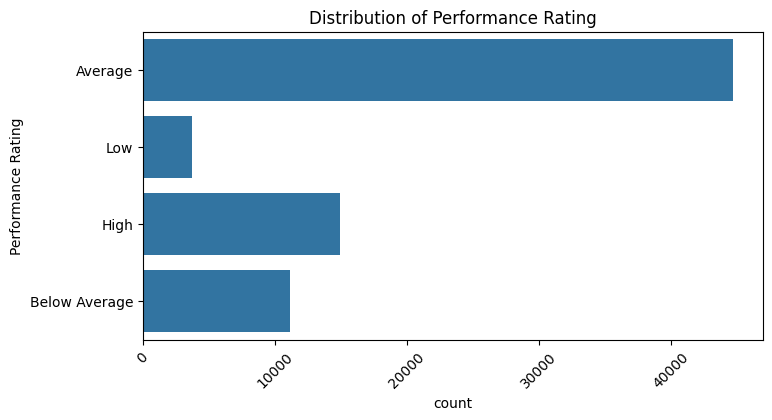

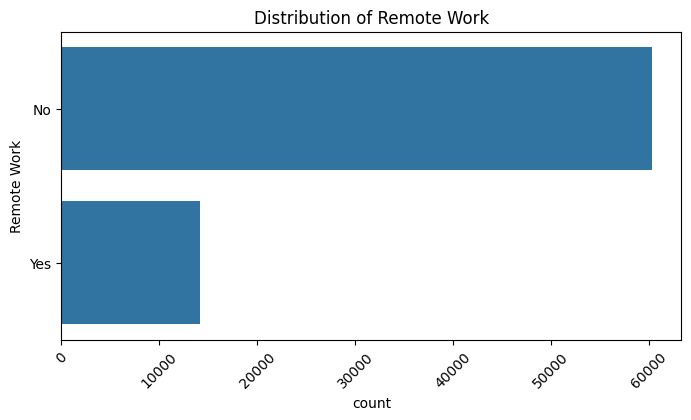

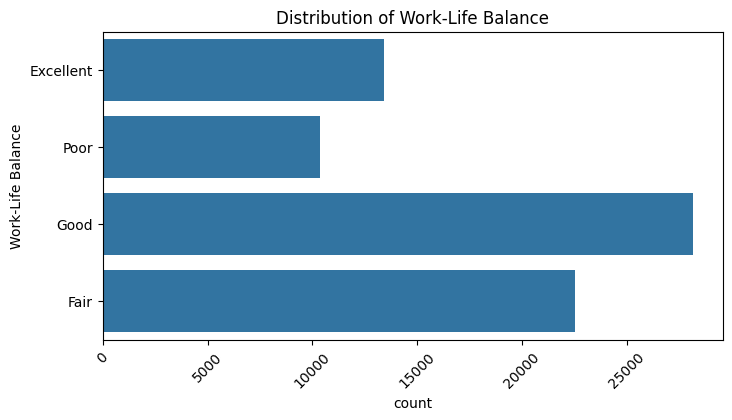

In [ ]:
# 범주형 변수 분포 확인
categorical_columns = data.select_dtypes(include=['object']).columns.difference(['Attrition'])

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


범주형 변수의 경우,

전반적으로 상식적으로 희소한 가치를 가지는 속성의 경우 한쪽으로 치우쳐지는 분포를 확인할 수 있다. 예를 들어, Leadership Opportunities, Remote Work, Innovation Opportunities가 있다.

개념적으로 중간 단계에 위치하는 속성 범주에 빈도가 가장 높게 보이는 것을 확인할 수 있다. 평가, 학력, 만족도, 회사 규모 등의 속성이 그러하다.

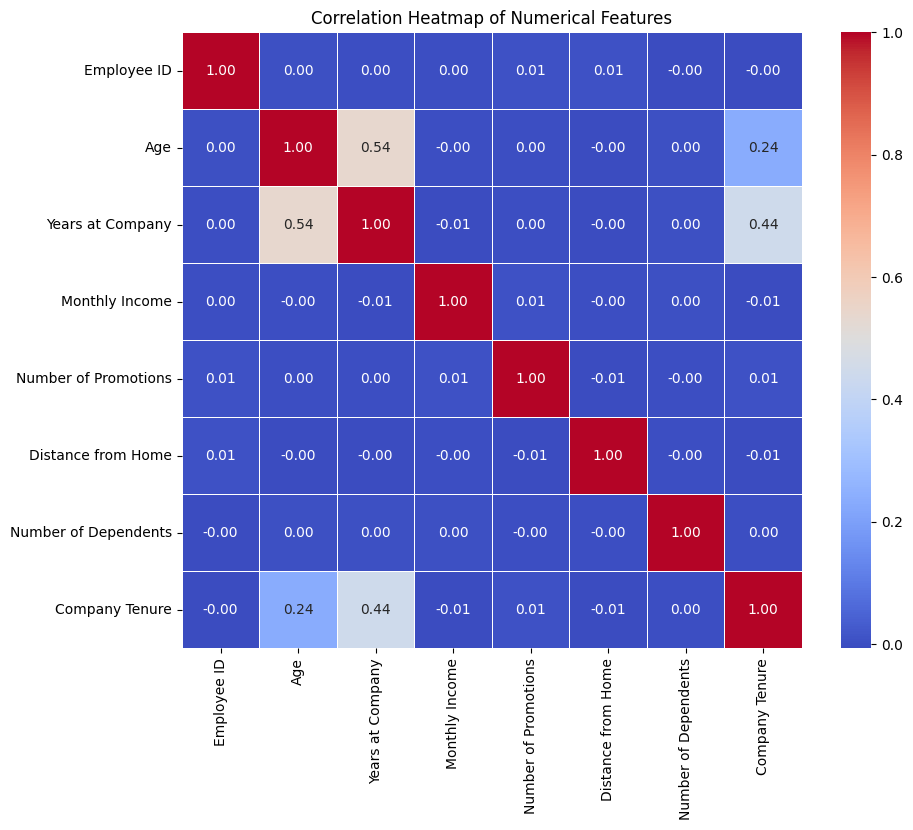

In [ ]:
# 수치형 변수들만 선택 (수치형 데이터 타입이 'float64' 또는 'int64'인 컬럼들)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# 상관 행렬 계산
correlation_matrix = data[numeric_columns].corr()

# 상관 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


수치형 변수들의 상관관계를 분석해 본 결과,


Age와 Years at Company (0.54)  
Age와 Years at Company 간에는 양의 중간 정도 상관관계가 존재한다.  
이는 나이가 많은 직원일수록 회사에서 근무한 연수가 많을 가능성이 있음을 시사한다.  

Age와 Company Tenure (0.24)  
Age와 Company Tenure 간에는 약한 양의 상관관계가 존재한다.  
이는 나이가 들수록 회사에서 근무한 기간도 증가하는 경향이 있음을 보여준다.  

Years at Company와 Company Tenure (0.44)  
Years at Company와 Company Tenure 간에는 양의 중간 정도 상관관계가 존재한다.  
이는 회사에서의 근속 연수와 현재 회사 내 직책의 기간이 일정 부분 연결되어 있을 수 있음을 암시한다.  

나머지 변수 간의 상관관계  
대부분의 변수들 간 상관계수는 0에 가까우며, 이는 변수들 간에 뚜렷한 상관관계가 없음을 의미한다.  
예를 들어, Monthly Income, Number of Promotions, Distance from Home, Number of Dependents 등은 서로 독립적인 관계를 가지고 있다.  

Employee ID와 다른 변수들 간 상관관계 (0에 가까움)  
Employee ID는 단순히 직원들을 식별하기 위한 고유값으로, 다른 변수들과 아무런 상관관계가 없다.


추추 Employee ID 속성은 삭제하도록 하겠다.

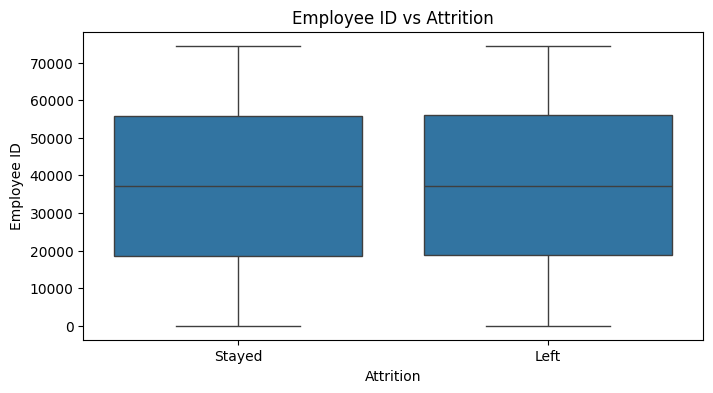

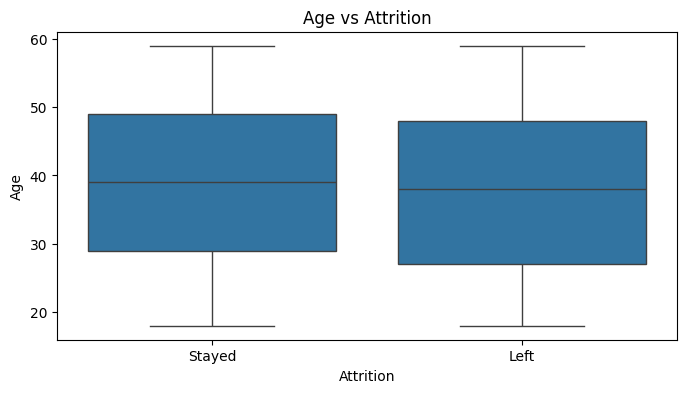

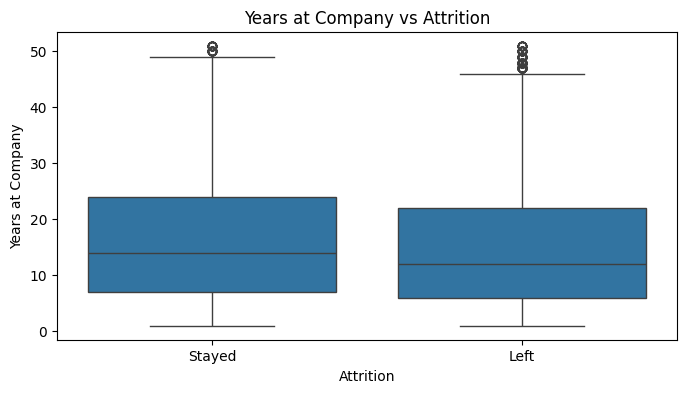

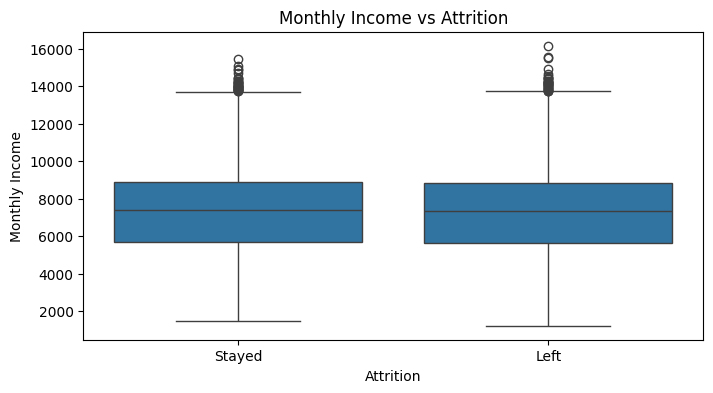

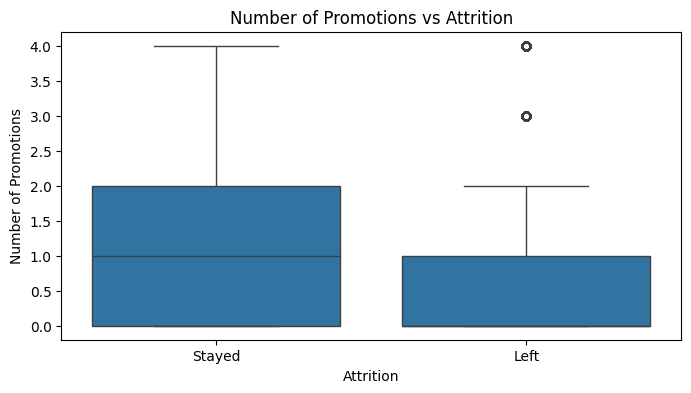

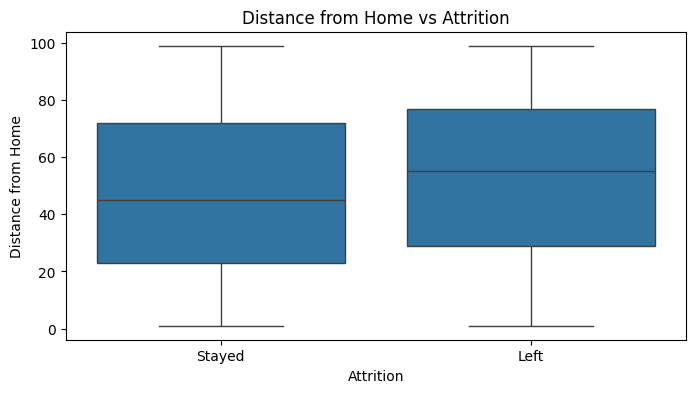

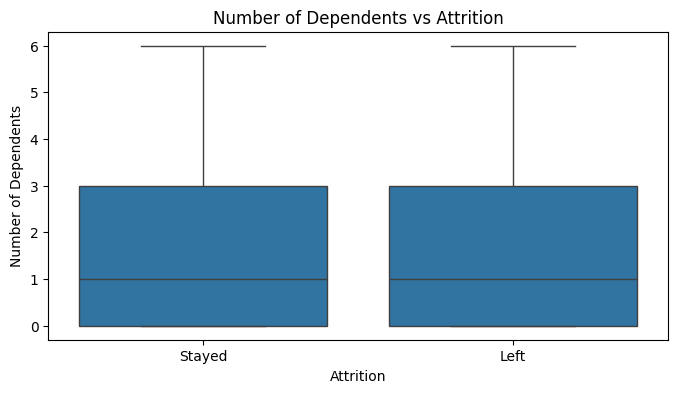

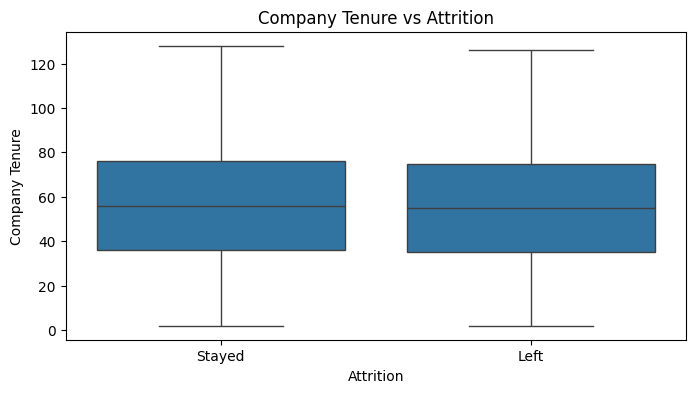

In [ ]:
# 타겟 변수에 따른 수치형 변수 분포 비교
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data['Attrition'], y=data[col])
    plt.title(f'{col} vs Attrition')
    plt.show()


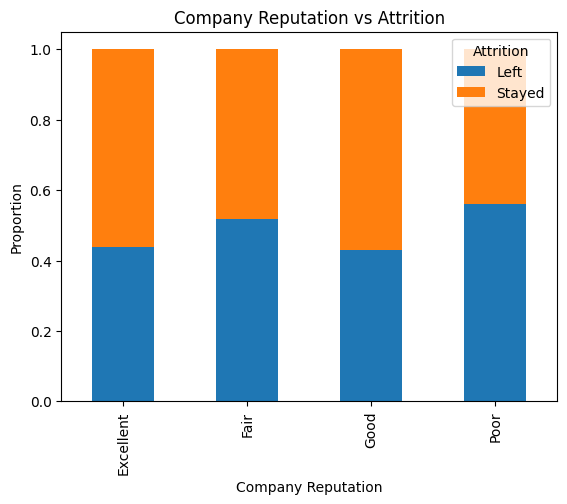

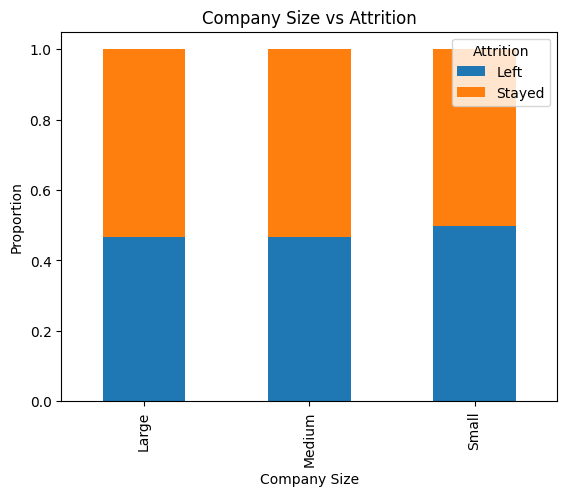

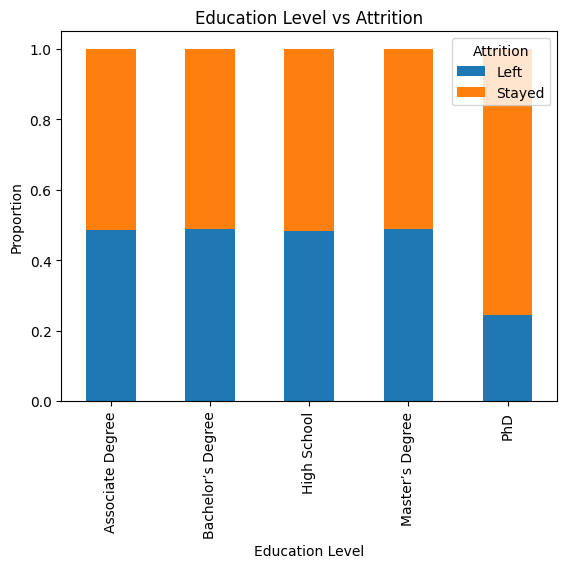

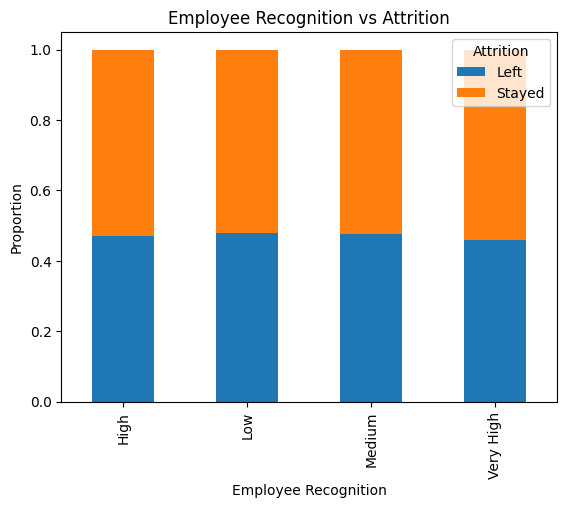

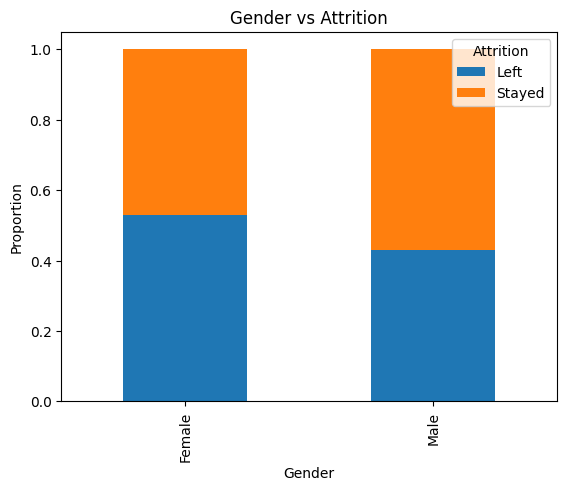

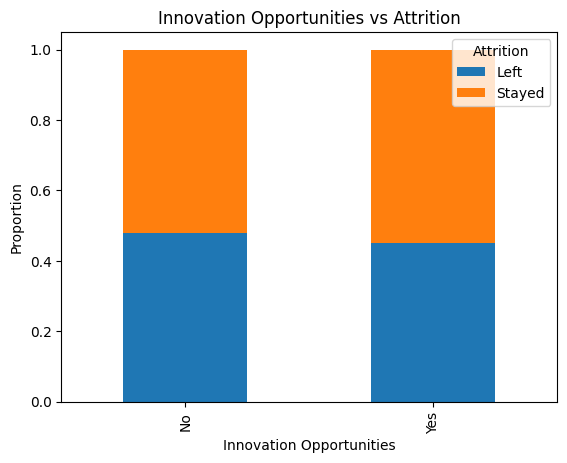

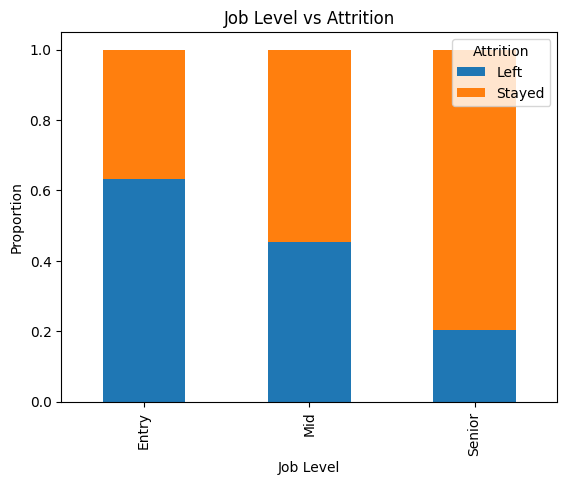

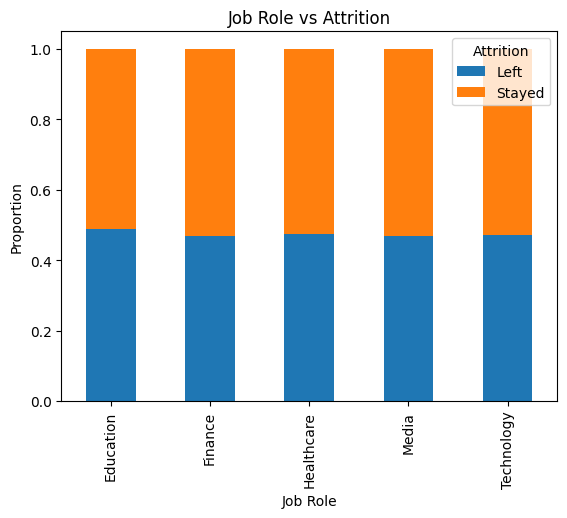

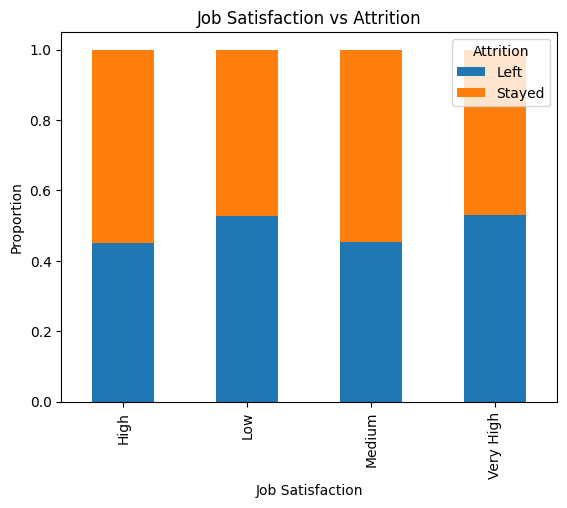

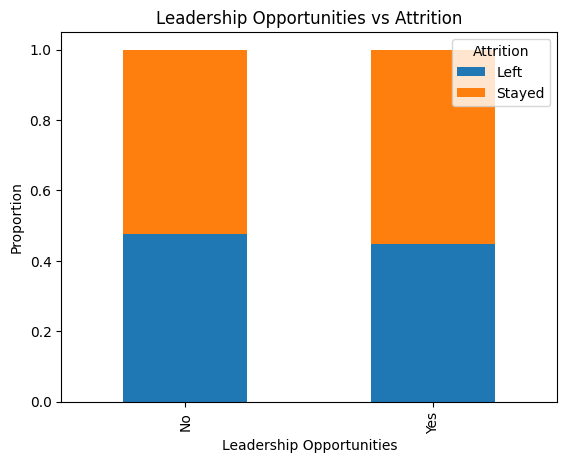

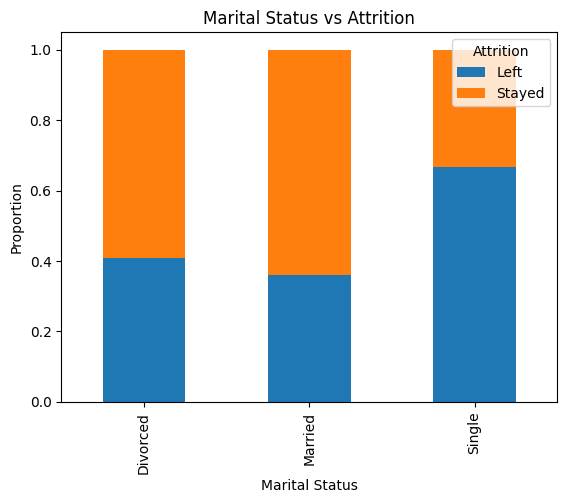

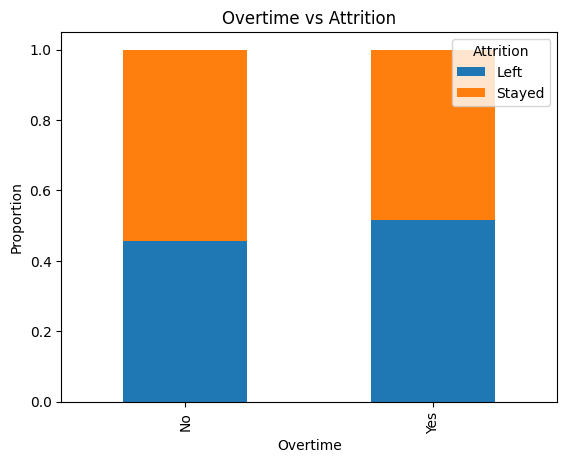

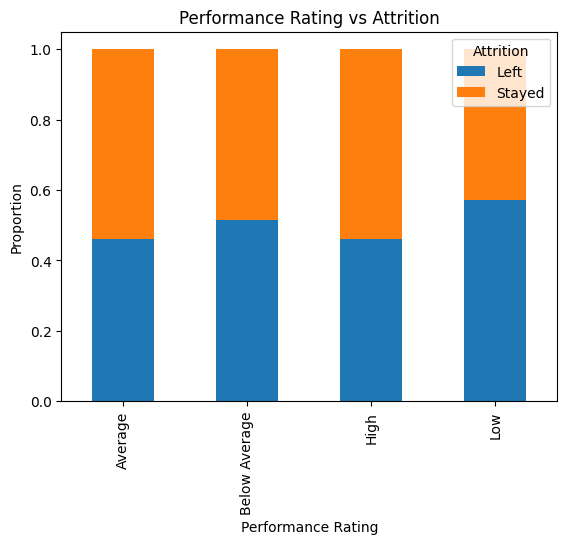

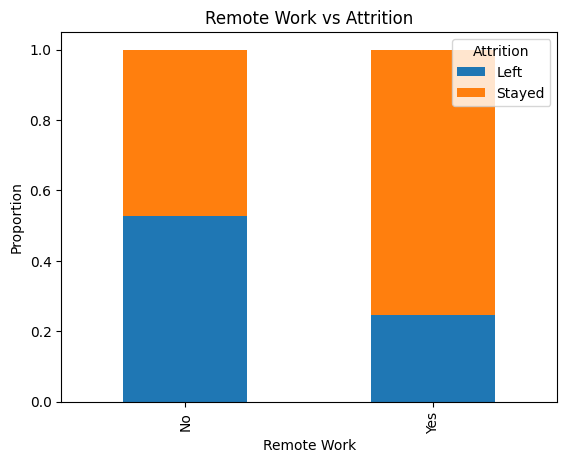

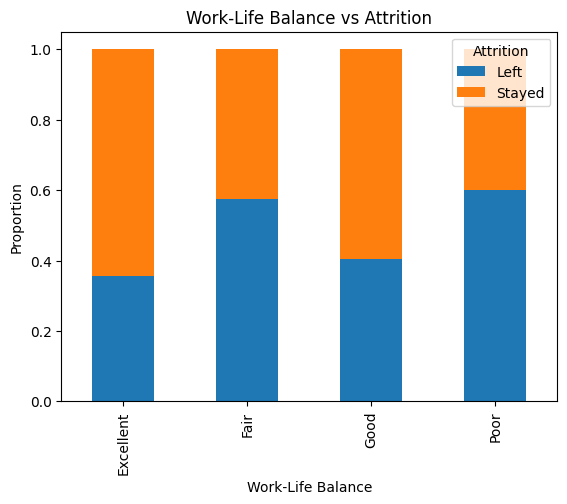

In [ ]:
# 타겟 변수에 따른 범주형 변수 비율
for col in categorical_columns:
    cross_tab = pd.crosstab(data[col], data['Attrition'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Attrition')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(title='Attrition', loc='upper right')
    plt.show()

Remote Work의 경우 꽤나 클래스 비율 차이가 나는 것을 확인할 수 있다.

데이터 전처리 결정


'Employee ID'는 모두 다른 값을 지니므로 학습의 복잡도를 올릴 수 있으니 drop한다.

이상치가 나온 컬럼에 대하여 lower bound와 upper bound에 값을 맞추는 방식으로 이상치 처리를 한다.

범주형 변수들 중 순서가 있는 데이터의 경우 LableEncoding을 진행하고, 그 외에는 원핫인코딩을 진행한다.

연속형 수치 변수의 경우 StandardScaler로 표준화한다.




**데이터 전처리**

'Employee ID' drop


In [ ]:
drop_columns = ['Employee ID']

# 데이터에서 드롭
data = data.drop(columns=drop_columns)

# 결과 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       74498 non-null  int64 
 1   Gender                    74498 non-null  object
 2   Years at Company          74498 non-null  int64 
 3   Job Role                  74498 non-null  object
 4   Monthly Income            74498 non-null  int64 
 5   Work-Life Balance         74498 non-null  object
 6   Job Satisfaction          74498 non-null  object
 7   Performance Rating        74498 non-null  object
 8   Number of Promotions      74498 non-null  int64 
 9   Overtime                  74498 non-null  object
 10  Distance from Home        74498 non-null  int64 
 11  Education Level           74498 non-null  object
 12  Marital Status            74498 non-null  object
 13  Number of Dependents      74498 non-null  int64 
 14  Job Level             

앞서 확인한 이상치에 대하여, lower bound와 upper bound에 값을 맞추는 방식으로 이상치 처리를 진행하였다.

진행 후, 결과도 함께 표시하였다.

In [ ]:
def clip_outliers(df, numeric_columns):
    for col in numeric_columns:
        # 각 수치형 변수의 IQR 계산
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # IQR에 기반한 lower bound와 upper bound 계산
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 이상치를 lower_bound와 upper_bound로 클리핑
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

numeric_data = data.select_dtypes(include=['int64', 'float64'])

# 이상치 처리
data_cleaned = clip_outliers(data.copy(), numeric_data)

# 이상치 처리 후, 결과 확인
outlier_info_after = detect_and_clip_outliers(data_cleaned, numeric_data)

# 이상치 처리 후 결과 출력
for col, info in outlier_info_after.items():
    print(f"After Clipping - Column: {col}")
    print(f"  Lower Bound: {info['lower_bound']}")
    print(f"  Upper Bound: {info['upper_bound']}")
    print(f"  Number of Outliers: {info['outliers_count']}")
    print(f"  Outliers Percentage: {info['outliers_percentage']:.2f}%\n")

data = data_cleaned

After Clipping - Column: Age
  Lower Bound: -3.5
  Upper Bound: 80.5
  Number of Outliers: 0
  Outliers Percentage: 0.00%

After Clipping - Column: Years at Company
  Lower Bound: -17.0
  Upper Bound: 47.0
  Number of Outliers: 0
  Outliers Percentage: 0.00%

After Clipping - Column: Monthly Income
  Lower Bound: 816.0
  Upper Bound: 13712.0
  Number of Outliers: 0
  Outliers Percentage: 0.00%

After Clipping - Column: Number of Promotions
  Lower Bound: -3.0
  Upper Bound: 5.0
  Number of Outliers: 0
  Outliers Percentage: 0.00%

After Clipping - Column: Distance from Home
  Lower Bound: -50.0
  Upper Bound: 150.0
  Number of Outliers: 0
  Outliers Percentage: 0.00%

After Clipping - Column: Number of Dependents
  Lower Bound: -4.5
  Upper Bound: 7.5
  Number of Outliers: 0
  Outliers Percentage: 0.00%

After Clipping - Column: Company Tenure
  Lower Bound: -24.0
  Upper Bound: 136.0
  Number of Outliers: 0
  Outliers Percentage: 0.00%



범주형 변수 인코딩

순서가 있는 Job Level, Education Level. Performance Rating. Job Satisfaction 에는 레이블 인코딩을 적용하고, 그 외에는 원핫 인코딩을 진행한다.

In [ ]:
one_hot_columns = [
    'Gender', 'Job Role', 'Work-Life Balance',
     'Overtime', 'Marital Status',
    'Company Size', 'Remote Work', 'Leadership Opportunities',
    'Innovation Opportunities', 'Company Reputation', 'Employee Recognition'
]

label_columns = ['Job Level', 'Performance Rating', 'Job Satisfaction', 'Education Level','Attrition']

from sklearn.preprocessing import LabelEncoder

# 1. 원핫 인코딩
data_encoded = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

# 2. 레이블 인코딩
label_encoder = LabelEncoder()

# 레이블 인코딩 적용
for col in label_columns:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

data = data_encoded
# 결과 확인
data.head()

,Age,Years at Company,Monthly Income,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Education Level,Number of Dependents,Job Level,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,31,19,5390,2,0,2,22,0,0,1,...,False,False,False,False,False,False,False,False,True,False
1,59,4,5534,0,3,3,21,3,3,1,...,False,False,False,False,True,False,False,True,False,False
2,24,10,8159,0,3,0,11,1,3,1,...,False,False,False,False,False,False,True,True,False,False
3,36,7,3989,0,2,1,27,2,2,1,...,True,True,False,False,False,True,False,False,True,False
4,56,41,4821,3,0,0,71,2,0,2,...,False,False,False,False,True,False,False,False,True,False


모델이 더 잘 학습할 수 있도록 standard scaler로 스케일링 진행

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 표준화할 컬럼 리스트
columns = [
    "Age",
    "Years at Company",
    "Monthly Income",
    "Number of Promotions",
    "Distance from Home",
    "Number of Dependents",
    "Company Tenure"
]

# 데이터 예시 (data는 이미 로드된 데이터프레임이라고 가정)
# data = pd.read_csv("your_dataset.csv")

# 스케일러 객체 생성
scaler = StandardScaler()

# 지정된 컬럼에 대해서만 표준화 수행
data[columns] = scaler.fit_transform(data[columns])

# 표준화 결과 확인
print(data.head())

        Age  Years at Company  Monthly Income  Job Satisfaction  \
0 -0.623149          0.293542       -0.887439                 2   
1  1.694084         -1.045952       -0.820495                 0   
2 -1.202458         -0.510154        0.399835                 0   
3 -0.209358         -0.778053       -1.538747                 0   
4  1.445809          2.258134       -1.151960                 3   

   Performance Rating  Number of Promotions  Distance from Home  \
0                   0              1.172597           -0.981699   
1                   3              2.177337           -1.016770   
2                   3             -0.836883           -1.367482   
3                   2              0.167857           -0.806343   
4                   0             -0.836883            0.736790   

   Education Level  Number of Dependents  Job Level  ...  Company Size_Small  \
0                0             -1.062244          1  ...               False   
1                3              0.

In [ ]:
correlation_with_target = data.corr()["Attrition"].sort_values(ascending=False)

# 출력
print(correlation_with_target)

Attrition                         1.000000
Job Level                         0.315289
Marital Status_Married            0.230138
Remote Work_Yes                   0.221191
Work-Life Balance_Good            0.110919
Gender_Male                       0.100637
Company Reputation_Good           0.089523
Number of Promotions              0.081184
Number of Dependents              0.074606
Years at Company                  0.065419
Education Level                   0.051912
Age                               0.050801
Company Tenure                    0.028964
Innovation Opportunities_Yes      0.021548
Company Size_Medium               0.018948
Leadership Opportunities_Yes      0.011995
Monthly Income                    0.010726
Employee Recognition_Very High    0.006695
Job Role_Media                    0.005517
Job Role_Technology               0.004579
Job Role_Finance                  0.004450
Job Role_Healthcare              -0.000361
Employee Recognition_Medium      -0.001575
Employee Re

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 범주형 변수 인코딩
categorical_columns = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# `Attrition`과 모든 변수 간 상관관계 확인
correlation_with_target = data.corr()["Attrition"].sort_values(ascending=False)
print(correlation_with_target)

Attrition                         1.000000
Job Level                         0.315289
Marital Status_Married            0.230138
Remote Work_Yes                   0.221191
Work-Life Balance_Good            0.110919
Gender_Male                       0.100637
Company Reputation_Good           0.089523
Number of Promotions              0.081184
Number of Dependents              0.074606
Years at Company                  0.065419
Education Level                   0.051912
Age                               0.050801
Company Tenure                    0.028964
Innovation Opportunities_Yes      0.021548
Company Size_Medium               0.018948
Leadership Opportunities_Yes      0.011995
Monthly Income                    0.010726
Employee Recognition_Very High    0.006695
Job Role_Media                    0.005517
Job Role_Technology               0.004579
Job Role_Finance                  0.004450
Job Role_Healthcare              -0.000361
Employee Recognition_Medium      -0.001575
Employee Re

In [ ]:
train_data = data.iloc[:59598]  # 0부터 59597번째 행까지
test_data = data.iloc[59598:]   # 59598번째 행 이후

# train_data와 test_data 확인
print(train_data.shape)
print(test_data.shape)

(59598, 34)
(14900, 34)


데이터 전처리 파이프라인

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

# 이상치 처리 함수
class OutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
        for col in numeric_columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)
        return X

# 레이블 인코딩 함수
def encode_labels(data, label_columns):
    label_encoder = LabelEncoder()
    for col in label_columns:
        data[col] = label_encoder.fit_transform(data[col])
    return data

# 데이터 전처리 파이프라인 구성
pipeline = Pipeline(steps=[
    ('outlier_clip', OutlierClipper()),  # 이상치 처리
    ('preprocess', ColumnTransformer(
        transformers=[('onehot', OneHotEncoder(drop='first'), [
            'Gender', 'Job Role', 'Work-Life Balance',
            'Overtime', 'Marital Status', 'Company Size', 'Remote Work',
            'Leadership Opportunities', 'Innovation Opportunities',
            'Company Reputation', 'Employee Recognition'
        ])], remainder='passthrough')),  # 인코딩 처리
    ('scaler', StandardScaler()),  # 스케일링 처리
    ('label_encoding', FunctionTransformer(lambda x: encode_labels(x, [
        'Job Level', 'Performance Rating', 'Job Satisfaction', 'Education Level','Attrition'
    ]), validate=False))  # 레이블 인코딩
])

**Baseline 모델 실험을 통한 기본 성능 조사**

Baseline 모델 5 가지로 , 로지스틱 회귀, 서포트 벡터 머신, 랜덤 포레스트, KNN, MLP를 사용하였다.

로지스틱 회귀는 선형 관계가 있을 때 빠르고 해석 가능하며, 결과를 확률로 해석할 수 있는 장점이 있다.

SVM은 비선형 경계를 잘 찾아내므로 복잡한 관계를 모델링할 때 유리하다.

랜덤 포레스트는 다양한 특성 간 상호작용을 모델링할 수 있으며, 과적합을 방지하고 중요한 변수를 찾을 수 있어 매우 유용하다.

KNN은 직관적이고 비선형적인 패턴을 잘 파악할 수 있으며, 간단한 데이터셋에서 좋은 성능을 보일 수 있다.

MLP는 비선형적이고 복잡한 관계가 있을 때 뛰어난 성능을 발휘하며, 많은 데이터가 있을 경우 좋은 결과를 얻을 수 있다.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
sampled_td = train_data.sample(frac=0.2, random_state=42)  # 20% 데이터를 랜덤으로 선택

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
# 데이터 준비
X = sampled_td.drop(columns=['Attrition'])
y = sampled_td['Attrition']

# Stratified K-Fold 설정
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 성능 지표 정의
scoring_metrics = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 정의
logistic_model = LogisticRegression(solver='liblinear', C=0.5, max_iter=200)



# 교차 검증
cv_results_logistic = {metric: cross_val_score(logistic_model, X, y, cv=kfold, scoring=scorer)
                       for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Logistic Regression Results:")
for metric, scores in cv_results_logistic.items():
     print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")



Logistic Regression Results:
Precision - Mean: 0.7527, Std: 0.0060
Recall - Mean: 0.7622, Std: 0.0127
F1 - Mean: 0.7573, Std: 0.0052


In [ ]:
from sklearn.svm import SVC

# 모델 정의
svm_model = SVC(kernel='linear', C=1.0)

# 교차 검증
cv_results_svm = {metric: cross_val_score(svm_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("SVM Results:")
for metric, scores in cv_results_svm.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")


SVM Results:
Precision - Mean: 0.7502, Std: 0.0053
Recall - Mean: 0.7614, Std: 0.0113
F1 - Mean: 0.7557, Std: 0.0052


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 정의
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 교차 검증
cv_results_rf = {metric: cross_val_score(random_forest_model, X, y, cv=kfold, scoring=scorer)
                 for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Random Forest Results:")
for metric, scores in cv_results_rf.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")


Random Forest Results:
Precision - Mean: 0.7403, Std: 0.0041
Recall - Mean: 0.7758, Std: 0.0093
F1 - Mean: 0.7576, Std: 0.0032


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5, algorithm='auto', metric='minkowski', p=2, weights='uniform')

# 교차 검증
cv_results_knn = {metric: cross_val_score(knn_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("KNN Results:")
for metric, scores in cv_results_knn.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")


KNN Results:
Precision - Mean: 0.6615, Std: 0.0083
Recall - Mean: 0.6589, Std: 0.0087
F1 - Mean: 0.6601, Std: 0.0076


In [ ]:
from sklearn.neural_network import MLPClassifier

# 모델 정의
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, learning_rate_init=0.001, random_state=42)

# 교차 검증
cv_results_mlp = {metric: cross_val_score(mlp_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("MLP Results:")
for metric, scores in cv_results_mlp.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLP Results:
Precision - Mean: 0.7258, Std: 0.0132
Recall - Mean: 0.7347, Std: 0.0240
F1 - Mean: 0.7298, Std: 0.0066


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(




**모델 성능 분석**

 1. **Logistic Regression**
- **Precision**: 0.7527  
- **Recall**: 0.7622  
- **F1 Score**: 0.7573  

**분석**:  
로지스틱 회귀 모델은 Precision과 Recall 값이 모두 높은 편이다. F1 Score가 약간 높으므로 균형 잡힌 성능을 보이고 있다. 정밀도(Precision)와 재현율(Recall)의 차이가 크지 않기 때문에, 이 모델은 비교적 잘 균형 잡힌 분류 성능을 보여준다.

 2. **SVM (Support Vector Machine)**
- **Precision**: 0.7502  
- **Recall**: 0.7614  
- **F1 Score**: 0.7557  

**분석**:  
SVM 모델은 로지스틱 회귀와 비슷한 성능을 보인다. Precision과 Recall 값이 모두 높은데, 로지스틱 회귀와 비교하여 다소 낮은 Precision을 보인다. 그러나 Recall과 F1 Score는 로지스틱 회귀와 비슷한 수준으로 유지된다. SVM은 일반적으로 경계가 명확한 분류 문제에서 좋은 성능을 보이지만, 이 경우 로지스틱 회귀와 큰 차이는 없다.

 3. **Random Forest**
- **Precision**: 0.7403  
- **Recall**: 0.7758  
- **F1 Score**: 0.7576  

**분석**:  
랜덤 포레스트 모델은 Recall 값이 상대적으로 높다. 즉, 이 모델은 실제로 "이탈"한 고객을 더 많이 식별하는 경향이 있다. Precision은 다른 모델들보다는 약간 낮지만, Recall이 높기 때문에 F1 Score는 로지스틱 회귀나 SVM과 유사한 수준을 유지한다. 이 모델은 더 많은 데이터를 통해 복잡한 패턴을 잡아낼 수 있는 특성을 가진 모델이다.

 4. **KNN (K-Nearest Neighbors)**
- **Precision**: 0.6615  
- **Recall**: 0.6589  
- **F1 Score**: 0.6601  

**분석**:  
KNN 모델은 다른 모델들에 비해 상당히 낮은 Precision과 Recall 값을 보인다. 이 모델은 특히 데이터의 특성이 단순하거나 분류 경계가 모호한 경우에 성능이 떨어질 수 있다. 또한, KNN은 데이터의 분포가 고르지 않거나, 고차원 데이터에서 성능이 낮아질 수 있다.

 5. **MLP (Multi-Layer Perceptron)**
- **Precision**: 0.7258  
- **Recall**: 0.7347  
- **F1 Score**: 0.7298  

**분석**:  
MLP는 다른 모델들에 비해 조금 낮은 성능을 보인다. Precision과 Recall 값이 중간 정도에 위치하고, F1 Score도 이와 비슷하게 나타나는데, 이는 MLP가 비선형 관계를 학습할 수 있지만, 이 데이터에서는 다른 모델들에 비해 우수한 성능을 내지 못한 것으로 보인다.

---

 **결론**

- **가장 안정적인 성능을 보인 모델**: `Logistic Regression`과 `SVM` 모델이 비슷한 성능을 보이며, 다른 모델들에 비해 안정적이고 균형 잡힌 성능을 보인다. 특히 F1 Score가 다른 모델들에 비해 고르게 높다.
- **우수한 Recall 값**: `Random Forest` 모델은 Recall과 F1 Score가 가장 높아, 실제 이탈한 고객을 잘 찾아낼 수 있지만, Precision은 낮아 False Positive가 많을 수 있다.
- **성능이 떨어진 모델**: `KNN`은 다른 모델들에 비해 상대적으로 낮은 성능을 보인다. 이 모델은 데이터의 복잡성이나 특징에 따라 성능이 크게 달라질 수 있기 때문에, 추가적인 하이퍼파라미터 튜닝이나 데이터 전처리가 필요할 수 있다.

* 물론 성능 개선을 수행하면 KNN과 MLP 또한 성능 개선이 되겠지만, 앞선 세 가지 모델이 더 높고 안정적인 성능을 보였으니


* 고객 이탈 예측과 같은 문제에서는 **Recall**을 더 중요시하니, RamdomForest와 함께, LogisticRegrresion 과 SVC에 대한 성능을 집중적으로 확인해보며 성능 개선 trial을 진행해보겠다.


In [ ]:
samptd = train_data.sample(frac=0.2, random_state=24)  # 20% 데이터를 랜덤으로 선택
X = samptd.drop(columns=['Attrition'])
y = samptd['Attrition']

LogisticRegression 성능 개선

In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 정의
logistic_model = LogisticRegression(solver='liblinear', C=0.5, max_iter=100)

# 교차 검증
cv_results_logistic = {metric: cross_val_score(logistic_model, X, y, cv=kfold, scoring=scorer)
                       for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Logistic Regression Results:")
for metric, scores in cv_results_logistic.items():
     print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Logistic Regression Results:
Precision - Mean: 0.7588, Std: 0.0100
Recall - Mean: 0.7681, Std: 0.0103
F1 - Mean: 0.7633, Std: 0.0018


In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 정의
logistic_model = LogisticRegression(solver='liblinear', C=0.5, max_iter=200)

# 교차 검증
cv_results_logistic = {metric: cross_val_score(logistic_model, X, y, cv=kfold, scoring=scorer)
                       for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Logistic Regression Results:")
for metric, scores in cv_results_logistic.items():
     print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Logistic Regression Results:
Precision - Mean: 0.7588, Std: 0.0100
Recall - Mean: 0.7681, Std: 0.0103
F1 - Mean: 0.7633, Std: 0.0018


In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 정의
logistic_model = LogisticRegression(solver='liblinear', C=0.5, max_iter=300)

# 교차 검증
cv_results_logistic = {metric: cross_val_score(logistic_model, X, y, cv=kfold, scoring=scorer)
                       for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Logistic Regression Results:")
for metric, scores in cv_results_logistic.items():
     print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Logistic Regression Results:
Precision - Mean: 0.7588, Std: 0.0100
Recall - Mean: 0.7681, Std: 0.0103
F1 - Mean: 0.7633, Std: 0.0018


In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 정의
logistic_model = LogisticRegression(solver='liblinear', C=0.5, max_iter=400)

# 교차 검증
cv_results_logistic = {metric: cross_val_score(logistic_model, X, y, cv=kfold, scoring=scorer)
                       for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Logistic Regression Results:")
for metric, scores in cv_results_logistic.items():
     print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Logistic Regression Results:
Precision - Mean: 0.7588, Std: 0.0100
Recall - Mean: 0.7681, Std: 0.0103
F1 - Mean: 0.7633, Std: 0.0018


In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 정의
logistic_model = LogisticRegression(solver='liblinear', C=0.5, max_iter=500)

# 교차 검증
cv_results_logistic = {metric: cross_val_score(logistic_model, X, y, cv=kfold, scoring=scorer)
                       for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Logistic Regression Results:")
for metric, scores in cv_results_logistic.items():
     print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Logistic Regression Results:
Precision - Mean: 0.7588, Std: 0.0100
Recall - Mean: 0.7681, Std: 0.0103
F1 - Mean: 0.7633, Std: 0.0018


max_iter 변화에 따른 성능 변화 없음.

In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 정의
logistic_model = LogisticRegression(solver='liblinear', C=0.1, max_iter=100)

# 교차 검증
cv_results_logistic = {metric: cross_val_score(logistic_model, X, y, cv=kfold, scoring=scorer)
                       for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Logistic Regression Results:")
for metric, scores in cv_results_logistic.items():
     print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Logistic Regression Results:
Precision - Mean: 0.7581, Std: 0.0092
Recall - Mean: 0.7686, Std: 0.0119
F1 - Mean: 0.7631, Std: 0.0018


In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 정의
logistic_model = LogisticRegression(solver='liblinear', C=0.2, max_iter=100)

# 교차 검증
cv_results_logistic = {metric: cross_val_score(logistic_model, X, y, cv=kfold, scoring=scorer)
                       for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Logistic Regression Results:")
for metric, scores in cv_results_logistic.items():
     print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Logistic Regression Results:
Precision - Mean: 0.7579, Std: 0.0097
Recall - Mean: 0.7679, Std: 0.0114
F1 - Mean: 0.7628, Std: 0.0017


In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 정의
logistic_model = LogisticRegression(solver='liblinear', C=0.3, max_iter=100)

# 교차 검증
cv_results_logistic = {metric: cross_val_score(logistic_model, X, y, cv=kfold, scoring=scorer)
                       for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Logistic Regression Results:")
for metric, scores in cv_results_logistic.items():
     print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Logistic Regression Results:
Precision - Mean: 0.7586, Std: 0.0100
Recall - Mean: 0.7676, Std: 0.0106
F1 - Mean: 0.7629, Std: 0.0019


In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 정의
logistic_model = LogisticRegression(solver='liblinear', C=0.4, max_iter=100)

# 교차 검증
cv_results_logistic = {metric: cross_val_score(logistic_model, X, y, cv=kfold, scoring=scorer)
                       for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Logistic Regression Results:")
for metric, scores in cv_results_logistic.items():
     print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Logistic Regression Results:
Precision - Mean: 0.7590, Std: 0.0101
Recall - Mean: 0.7681, Std: 0.0103
F1 - Mean: 0.7634, Std: 0.0018


In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 정의
logistic_model = LogisticRegression(solver='liblinear', C=0.5, max_iter=100)

# 교차 검증
cv_results_logistic = {metric: cross_val_score(logistic_model, X, y, cv=kfold, scoring=scorer)
                       for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Logistic Regression Results:")
for metric, scores in cv_results_logistic.items():
     print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Logistic Regression Results:
Precision - Mean: 0.7588, Std: 0.0100
Recall - Mean: 0.7681, Std: 0.0103
F1 - Mean: 0.7633, Std: 0.0018


In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 정의
logistic_model = LogisticRegression(solver='liblinear', C=0.6, max_iter=100)

# 교차 검증
cv_results_logistic = {metric: cross_val_score(logistic_model, X, y, cv=kfold, scoring=scorer)
                       for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Logistic Regression Results:")
for metric, scores in cv_results_logistic.items():
     print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Logistic Regression Results:
Precision - Mean: 0.7589, Std: 0.0099
Recall - Mean: 0.7681, Std: 0.0103
F1 - Mean: 0.7633, Std: 0.0018


In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 정의
logistic_model = LogisticRegression(solver='liblinear', C=0.7, max_iter=100)

# 교차 검증
cv_results_logistic = {metric: cross_val_score(logistic_model, X, y, cv=kfold, scoring=scorer)
                       for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Logistic Regression Results:")
for metric, scores in cv_results_logistic.items():
     print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Logistic Regression Results:
Precision - Mean: 0.7590, Std: 0.0098
Recall - Mean: 0.7684, Std: 0.0106
F1 - Mean: 0.7635, Std: 0.0019


In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 정의
logistic_model = LogisticRegression(solver='liblinear', C=1, max_iter=100)

# 교차 검증
cv_results_logistic = {metric: cross_val_score(logistic_model, X, y, cv=kfold, scoring=scorer)
                       for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Logistic Regression Results:")
for metric, scores in cv_results_logistic.items():
     print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Logistic Regression Results:
Precision - Mean: 0.7590, Std: 0.0098
Recall - Mean: 0.7686, Std: 0.0107
F1 - Mean: 0.7636, Std: 0.0017


C 값이 커지니 오히려 성능이 떨어짐.
따라서 로지스틱의 경우, logistic_model = LogisticRegression(solver='liblinear', C=0.7, max_iter=100) 이 경우에,

Precision - Mean: 0.7569, Std: 0.0145
Recall - Mean: 0.7684, Std: 0.0038
F1 - Mean: 0.7626, Std: 0.0088

이 경우 성능이 최적이다.

SVC 성능 개선

In [ ]:
from sklearn.svm import SVC

# 모델 정의
svm_model = SVC(kernel='linear', C=0.5)

# 교차 검증
cv_results_svm = {metric: cross_val_score(svm_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("SVM Results:")
for metric, scores in cv_results_svm.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

SVM Results:
Precision - Mean: 0.7594, Std: 0.0074
Recall - Mean: 0.7694, Std: 0.0112
F1 - Mean: 0.7642, Std: 0.0020


In [ ]:
from sklearn.svm import SVC

# 모델 정의
svm_model = SVC(kernel='linear', C=1.0)

# 교차 검증
cv_results_svm = {metric: cross_val_score(svm_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("SVM Results:")
for metric, scores in cv_results_svm.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

SVM Results:
Precision - Mean: 0.7591, Std: 0.0069
Recall - Mean: 0.7690, Std: 0.0113
F1 - Mean: 0.7639, Std: 0.0021


In [ ]:
from sklearn.svm import SVC

# 모델 정의
svm_model = SVC(kernel='linear', C=5.0)

# 교차 검증
cv_results_svm = {metric: cross_val_score(svm_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("SVM Results:")
for metric, scores in cv_results_svm.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

SVM Results:
Precision - Mean: 0.7594, Std: 0.0076
Recall - Mean: 0.7690, Std: 0.0110
F1 - Mean: 0.7641, Std: 0.0017


In [ ]:
from sklearn.svm import SVC

# 모델 정의
svm_model = SVC(kernel='linear', C=10)

# 교차 검증
cv_results_svm = {metric: cross_val_score(svm_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("SVM Results:")
for metric, scores in cv_results_svm.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

SVM Results:
Precision - Mean: 0.7591, Std: 0.0076
Recall - Mean: 0.7689, Std: 0.0108
F1 - Mean: 0.7639, Std: 0.0016


In [ ]:
from sklearn.svm import SVC

# 모델 정의
svm_model = SVC(kernel='linear', C=20)

# 교차 검증
cv_results_svm = {metric: cross_val_score(svm_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("SVM Results:")
for metric, scores in cv_results_svm.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

SVM Results:
Precision - Mean: 0.7593, Std: 0.0077
Recall - Mean: 0.7690, Std: 0.0110
F1 - Mean: 0.7640, Std: 0.0016


C 파라미터가 커지면서 precision 및 F1 score가 한 순간 감소하기 시작하고, std 또한 점차 증가하였지만 결국  **C가 20**일 때, 성능이 가장 좋았다.

svm_model = SVC(kernel='linear', C=20)

SVM Results:
Precision - Mean: 0.7593, Std: 0.0077
Recall - Mean: 0.7690, Std: 0.0110
F1 - Mean: 0.7640, Std: 0.0016

 kernal의 경우 이 데이터가 선형적으로 분류될 수 있는지 확인하기 위하여 사용한 모델이기에 linear로 고정하였다.

만약 성능 개선을 추가로 진행한다면 C의 값을 키우는 방향일 것이다.

RandomForest 성능 개선

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 정의
random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

# 교차 검증
cv_results_rf = {metric: cross_val_score(random_forest_model, X, y, cv=kfold, scoring=scorer)
                 for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Random Forest Results:")
for metric, scores in cv_results_rf.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Random Forest Results:
Precision - Mean: 0.7547, Std: 0.0057
Recall - Mean: 0.7735, Std: 0.0095
F1 - Mean: 0.7639, Std: 0.0028


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 정의
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 교차 검증
cv_results_rf = {metric: cross_val_score(random_forest_model, X, y, cv=kfold, scoring=scorer)
                 for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Random Forest Results:")
for metric, scores in cv_results_rf.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Random Forest Results:
Precision - Mean: 0.7573, Std: 0.0049
Recall - Mean: 0.7797, Std: 0.0083
F1 - Mean: 0.7683, Std: 0.0039


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 정의
random_forest_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# 교차 검증
cv_results_rf = {metric: cross_val_score(random_forest_model, X, y, cv=kfold, scoring=scorer)
                 for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Random Forest Results:")
for metric, scores in cv_results_rf.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Random Forest Results:
Precision - Mean: 0.7559, Std: 0.0020
Recall - Mean: 0.7775, Std: 0.0088
F1 - Mean: 0.7665, Std: 0.0046


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 정의
random_forest_model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)

# 교차 검증
cv_results_rf = {metric: cross_val_score(random_forest_model, X, y, cv=kfold, scoring=scorer)
                 for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Random Forest Results:")
for metric, scores in cv_results_rf.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Random Forest Results:
Precision - Mean: 0.7556, Std: 0.0045
Recall - Mean: 0.7808, Std: 0.0095
F1 - Mean: 0.7680, Std: 0.0039


n_estimator를 조정한 결과, 값이 커질 수록 성능이 높아지는 것을 확인할 수 있다. n_stimetor가 500 인 경우에 대하여 max_depth를 수정해보겠다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 정의
random_forest_model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42)

# 교차 검증
cv_results_rf = {metric: cross_val_score(random_forest_model, X, y, cv=kfold, scoring=scorer)
                 for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Random Forest Results:")
for metric, scores in cv_results_rf.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Random Forest Results:
Precision - Mean: 0.7256, Std: 0.0067
Recall - Mean: 0.8040, Std: 0.0092
F1 - Mean: 0.7627, Std: 0.0031


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 정의
random_forest_model = RandomForestClassifier(n_estimators=500, max_depth=15, random_state=42)

# 교차 검증
cv_results_rf = {metric: cross_val_score(random_forest_model, X, y, cv=kfold, scoring=scorer)
                 for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Random Forest Results:")
for metric, scores in cv_results_rf.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Random Forest Results:
Precision - Mean: 0.7563, Std: 0.0029
Recall - Mean: 0.7737, Std: 0.0065
F1 - Mean: 0.7649, Std: 0.0023


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 정의
random_forest_model = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)

# 교차 검증
cv_results_rf = {metric: cross_val_score(random_forest_model, X, y, cv=kfold, scoring=scorer)
                 for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("Random Forest Results:")
for metric, scores in cv_results_rf.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Random Forest Results:
Precision - Mean: 0.7562, Std: 0.0026
Recall - Mean: 0.7681, Std: 0.0076
F1 - Mean: 0.7621, Std: 0.0030


성능 개선 결과, 다음의 경우가 가장 성능이 높았다.

n_estimators=500, max_depth=5

random_forest_model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42)

성능은 다음과 같았다(가장 중요하게 여기는 성능은 Recall 이다).

Random Forest Results:
Precision - Mean: 0.7224, Std: 0.0040
Recall - Mean: 0.8032, Std: 0.0081
F1 - Mean: 0.7606, Std: 0.0059

나무의 수가 많아질 수록 성능이 올라감을 확인하였다. 또한 깊이가 오히려 줄어들면서 과적합을 방지하고 모델을 더 간단하게 만들어 데이터가 더 잘 일반화도니 것 같은 현상도 확인할 수 있었다.

**KNN 성능 개선**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3, algorithm='auto', metric='minkowski', p=2, weights='uniform')

# 교차 검증
cv_results_knn = {metric: cross_val_score(knn_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("KNN Results:")
for metric, scores in cv_results_knn.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

KNN Results:
Precision - Mean: 0.6561, Std: 0.0069
Recall - Mean: 0.6615, Std: 0.0118
F1 - Mean: 0.6588, Std: 0.0082


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5, algorithm='auto', metric='minkowski', p=2, weights='uniform')

# 교차 검증
cv_results_knn = {metric: cross_val_score(knn_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("KNN Results:")
for metric, scores in cv_results_knn.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

KNN Results:
Precision - Mean: 0.6664, Std: 0.0043
Recall - Mean: 0.6827, Std: 0.0046
F1 - Mean: 0.6744, Std: 0.0040


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=8, algorithm='auto', metric='minkowski', p=2, weights='uniform')

# 교차 검증
cv_results_knn = {metric: cross_val_score(knn_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("KNN Results:")
for metric, scores in cv_results_knn.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

KNN Results:
Precision - Mean: 0.7197, Std: 0.0054
Recall - Mean: 0.5940, Std: 0.0178
F1 - Mean: 0.6507, Std: 0.0111


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=12, algorithm='auto', metric='minkowski', p=2, weights='uniform')

# 교차 검증
cv_results_knn = {metric: cross_val_score(knn_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("KNN Results:")
for metric, scores in cv_results_knn.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

KNN Results:
Precision - Mean: 0.7244, Std: 0.0051
Recall - Mean: 0.6368, Std: 0.0136
F1 - Mean: 0.6777, Std: 0.0087


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=15, algorithm='auto', metric='minkowski', p=2, weights='uniform')

# 교차 검증
cv_results_knn = {metric: cross_val_score(knn_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("KNN Results:")
for metric, scores in cv_results_knn.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

KNN Results:
Precision - Mean: 0.7031, Std: 0.0040
Recall - Mean: 0.7168, Std: 0.0073
F1 - Mean: 0.7099, Std: 0.0033


n_neighbors 수정한 결과, neighor의 숫자가 커질 수록 성능(Recall)이 높아짐을 확인할 수 있으며, KNN의 경우 Precision과 Recall은 한 쪽의 성능이 높아지면 다른 한 쪽의 성능은 낮아지는 현상을 확인할 수 있다.

Best case는 n_neighbors=15, algorithm='auto', metric='minkowski', p=2, weights='uniform' 이며,

knn_model = KNeighborsClassifier(n_neighbors=15, algorithm='auto', metric='minkowski', p=2, weights='uniform')

 이때 성능은

Precision - Mean: 0.6963, Std: 0.0097
Recall - Mean: 0.7099, Std: 0.0028
F1 - Mean: 0.7030, Std: 0.0053

이렇다.

**MLP 성능 개선**

In [ ]:
from sklearn.neural_network import MLPClassifier

# 모델 정의
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, learning_rate_init=0.001, random_state=42)

# 교차 검증
cv_results_mlp = {metric: cross_val_score(mlp_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("MLP Results:")
for metric, scores in cv_results_mlp.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLP Results:
Precision - Mean: 0.7479, Std: 0.0093
Recall - Mean: 0.7325, Std: 0.0116
F1 - Mean: 0.7400, Std: 0.0045


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.neural_network import MLPClassifier

# 모델 정의
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, learning_rate_init=0.001, random_state=42)

# 교차 검증
cv_results_mlp = {metric: cross_val_score(mlp_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("MLP Results:")
for metric, scores in cv_results_mlp.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLP Results:
Precision - Mean: 0.7273, Std: 0.0049
Recall - Mean: 0.7324, Std: 0.0208
F1 - Mean: 0.7297, Std: 0.0103


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.neural_network import MLPClassifier

# 모델 정의
mlp_model = MLPClassifier(hidden_layer_sizes=(150,), max_iter=300, learning_rate_init=0.001, random_state=42)

# 교차 검증
cv_results_mlp = {metric: cross_val_score(mlp_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("MLP Results:")
for metric, scores in cv_results_mlp.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLP Results:
Precision - Mean: 0.7236, Std: 0.0052
Recall - Mean: 0.7456, Std: 0.0127
F1 - Mean: 0.7344, Std: 0.0069


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.neural_network import MLPClassifier

# 모델 정의
mlp_model = MLPClassifier(hidden_layer_sizes=(200,), max_iter=300, learning_rate_init=0.001, random_state=42)

# 교차 검증
cv_results_mlp = {metric: cross_val_score(mlp_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("MLP Results:")
for metric, scores in cv_results_mlp.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLP Results:
Precision - Mean: 0.7215, Std: 0.0125
Recall - Mean: 0.7345, Std: 0.0200
F1 - Mean: 0.7276, Std: 0.0052


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


hidden layer의 유닛 수를 증가하며 확인한 결과, 유닛수가 늘어날 수록 오히려 성능이 떨어졌다.

이번에는 유닛수가 50일 때, hidden layer의 수를 증가 시키며 같이 확인해보겠다.

In [ ]:
from sklearn.neural_network import MLPClassifier

# 모델 정의
mlp_model = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=300, learning_rate_init=0.001, random_state=42)

# 교차 검증
cv_results_mlp = {metric: cross_val_score(mlp_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("MLP Results:")
for metric, scores in cv_results_mlp.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLP Results:
Precision - Mean: 0.7121, Std: 0.0111
Recall - Mean: 0.7136, Std: 0.0214
F1 - Mean: 0.7125, Std: 0.0078


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.neural_network import MLPClassifier

# 모델 정의
mlp_model = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=300, learning_rate_init=0.001, random_state=42)

# 교차 검증
cv_results_mlp = {metric: cross_val_score(mlp_model, X, y, cv=kfold, scoring=scorer)
                  for metric, scorer in scoring_metrics.items()}

# 결과 출력
print("MLP Results:")
for metric, scores in cv_results_mlp.items():
    print(f"{metric.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multil

MLP Results:
Precision - Mean: 0.7020, Std: 0.0187
Recall - Mean: 0.7074, Std: 0.0145
F1 - Mean: 0.7114, Std: 0.0185


hidden layer 수를 증가시킨 결과, 오히려 성능이 낮아지는 현상을 확인할 수 있었다.

따라서 mlp의 최적 케이스는, mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, learning_rate_init=0.001, random_state=42) 이다.

Precision - Mean: 0.7479, Std: 0.0093
Recall - Mean: 0.7325, Std: 0.0116
F1 - Mean: 0.7400, Std: 0.0045

모델별로 가장 성능이 좋았던 모델들에 대하여, **feature selction**을 적용하고 적용하지 않은 경우에 대한 차이를 확인해보겠다.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
import numpy as np
import pandas as pd

# 데이터 준비 (C 데이터프레임이 이미 있다고 가정)
X = train_data.drop(columns=['Attrition'])  # Feature 데이터
y = train_data['Attrition']  # Target 데이터

# 모델 리스트
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=100),
    'SVM': SVC(kernel='linear', C=20),
    'Random Forest': RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=15, algorithm='auto', metric='minkowski', p=2, weights='uniform'),
    'MLP': MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, learning_rate_init=0.001, random_state=42)
}

# 특성 선택 개수를 전체 특성의 50%로 설정
n_features_to_select = int(X.shape[1] * 0.5)  # 전체 특성의 50%

# Recall 성능을 위한 scorer 정의
recall_scorer = make_scorer(recall_score)

# 모델별 RFE 및 성능 평가
cv_results = {}

for model_name, model in models.items():
    # RFE로 특성 선택
    selector = RFE(model, n_features_to_select=n_features_to_select)
    X_selected = selector.fit_transform(X, y)

    # 선택된 특성 출력
    selected_features = X.columns[selector.support_]
    print(f"\n{model_name} - Selected Features: {selected_features.tolist()}")

    # Recall 성능 평가
    scores = cross_val_score(model, X_selected, y, cv=5, scoring=recall_scorer)

    # 모델별 성능 출력
    print(f"{model_name} - Recall Scores: {scores}")
    print(f"{model_name} - Mean Recall: {np.mean(scores):.4f}, Std: {np.std(scores):.4f}")

    # 결과 저장
    cv_results[model_name] = scores

# 결과 출력 (교차 검증 결과)
cv_df = pd.DataFrame(cv_results, index=[f"Fold {i+1}" for i in range(5)])
cv_df.loc['Mean'] = cv_df.mean()
cv_df.loc['Std'] = cv_df.std()

print("\nCross-Validation Results (Recall):")
print(cv_df)


Selected Features: ['Age', 'Years at Company', 'Monthly Income', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Distance from Home', 'Education Level', 'Number of Dependents', 'Job Level', 'Company Tenure', 'Gender_Male', 'Job Role_Finance', 'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology', 'Work-Life Balance_Fair', 'Work-Life Balance_Good', 'Work-Life Balance_Poor', 'Overtime_Yes', 'Marital Status_Married', 'Marital Status_Single', 'Company Size_Medium', 'Company Size_Small', 'Remote Work_Yes', 'Leadership Opportunities_Yes', 'Innovation Opportunities_Yes', 'Company Reputation_Fair', 'Company Reputation_Good', 'Company Reputation_Poor', 'Employee Recognition_Low', 'Employee Recognition_Medium', 'Employee Recognition_Very High']
Logistic Regression: Mean Recall = 0.7620, Std = 0.0029


feature selection 없는 모델별 성능

로지스틱 회귀 (Logistic Regression)
- **Precision**: Mean: 0.7569, Std: 0.0145
- **Recall**: Mean: 0.7684, Std: 0.0038
- **F1**: Mean: 0.7626, Std: 0.0088

서포트 벡터 머신 (SVM)
- **Precision**: Mean: 0.7593, Std: 0.0077
- **Recall**: Mean: 0.7690, Std: 0.0110
- **F1**: Mean: 0.7640, Std: 0.0016

랜덤 포레스트 (Random Forest)
- **Precision**: Mean: 0.7224, Std: 0.0040
- **Recall**: Mean: 0.8032, Std: 0.0081
- **F1**: Mean: 0.7606, Std: 0.0059

K-최근접 이웃 (KNN)
- **Precision**: Mean: 0.6963, Std: 0.0097
- **Recall**: Mean: 0.7099, Std: 0.0028
- **F1**: Mean: 0.7030, Std: 0.0053

다층 퍼셉트론 (MLP)
- **Precision**: Mean: 0.7479, Std: 0.0093
- **Recall**: Mean: 0.7325, Std: 0.0116
- **F1**: Mean: 0.7400, Std: 0.0045


로지스틱 회귀, SVM, KNN, MLP는 feature selection을 적용할 때 성능이 개선되었다. 불필요한 특성을 제거하면 모델이 더 잘 일반화되고, 과적합을 방지할 수 있기 때문으로 보인다.
랜덤 포레스트는 이미 특성 선택을 내장하고 있는 앙상블 모델이기 때문에 있어, feature selection을 적용하지 않아도 좋은 성능을 유지하는 것으로 보인다. 오히려 feature selection이 성능을 저하할 수 있는 경우도 있을 수 있을 것으로 보인다.

위와 같이 성능 개선 trial을 진행하였다.

가장 좋은 성능이 나온 모델은 랜덤포레스트이다.
이 경우의 하이퍼파라미터에 대한 분석 결과를 다시 정리하자면,

나무의 수가 많아질 수록 성능이 올라감을 확인하였다. 또한 깊이가 오히려 줄어들면서 과적합을 방지하고 모델을 더 간단하게 만들어 데이터가 더 잘 일반화도니 것 같은 현상도 확인할 수 있었다.

따라서 이와 같은 케이스를 고려하여 해당 값(n_estimators=500, max_depth=5, random_state=42)과 유사한 범위 내에서 각가 randomized search를 진행하여 하이퍼 파라미터 개선을 다시 시도해보겠다.

**최종 모델 선정**

튜닝 결과, 성능이 가장 좋았던 모델은 '''''경우이고. 이 모델에 대하여 randomized search를 진행하겠다.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import numpy as np

# 성능 지표 정의
scoring_metrics = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# 데이터 준비
X = samptd.drop(columns=['Attrition'])  # 예시 데이터
y = samptd['Attrition']

# Stratified K-Fold 설정
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# 하이퍼파라미터 범위 설정 (기존 모델 값 근처로만 설정)
param_dist_rf = {
    'n_estimators': [400, 450, 500, 550, 600],  # n_estimators 근처 값
    'max_depth': [4, 5, 6, 7, 8],  # max_depth 근처 값
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 모델 정의
random_forest_model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV 설정
random_search_rf = RandomizedSearchCV(estimator=random_forest_model, param_distributions=param_dist_rf,
                                      n_iter=20, cv=kfold, scoring='recall', random_state=42, n_jobs=-1, verbose=2)

# RandomizedSearchCV 실행
random_search_rf.fit(X, y)

# 최적의 하이퍼파라미터와 성능 출력
print(f"Random Forest 최적의 하이퍼파라미터: {random_search_rf.best_params_}")
print(f"Random Forest 최고 성능 (F1): {random_search_rf.best_score_:.4f}")

최적의 하이퍼파라미터는 (
    n_estimators=550,
    min_samples_split=10,
    min_samples_leaf=4,
    max_depth=4,
    bootstrap=False,
    random_state=42
) 이다


이제 최종 모델을 통해 test 데이터셋에 대한 예측을 수행하겠다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
import pandas as pd

# 성능 지표 정의
scoring_metrics = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# 데이터 준비 (test_data는 이미 존재한다고 가정)
X_train = train_data.drop(columns=['Attrition'])  # 훈련 데이터
y_train = train_data['Attrition']  # 훈련 데이터의 타겟

teX = test_data.drop(columns=['Attrition'])
tey = test_data['Attrition']



# 하이퍼파라미터 튜닝 후 최적의 모델을 사용하여 학습
best_rf_model = RandomForestClassifier(
    n_estimators=550,
    min_samples_split=10,
    min_samples_leaf=4,
    max_depth=4,
    bootstrap=False,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# test_data에 대해 예측
y_pred = best_rf_model.predict(teX)

# 성능 지표 계산
precision = precision_score(tey, y_pred)
recall = recall_score(tey, y_pred)
f1 = f1_score(tey, y_pred)

# 결과 출력
print("Test Data Performance Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Test Data Performance Metrics:
Precision: 0.7076
Recall: 0.8149
F1 Score: 0.7575


Test 데이터셋에 대한 결과는 다음과 같다.

Precision: 0.7076
Recall: 0.8149
F1 Score: 0.7575

해당 결과로부터 분석할 수 있는 내용은 다음과 같다



분석:
Precision (0.7076):

Precision은 0.7076으로, 모델이 예측한 이직한 직원 중 실제로 이직한 직원의 비율을 나타낸다. 이 값이 상대적으로 낮다는 것은 모델이 잘못된 예측을 하는 경우가 많다는 의미이다. 즉, 이직하지 않은 직원을 이직했다고 예측하는 경우가 존재한다. Precision이 중요한 경우, 즉 잘못된 이직 예측을 줄이고자 할 때는 개선이 필요함을 시사한다.
Recall (0.8149):

Recall은 0.8149로, 실제로 이직한 직원들 중 모델이 이직한 직원으로 올바르게 예측한 비율을 나타낸다. 이 값은 꽤 높은 편으로, 모델이 실제 이직한 직원들을 잘 예측하고 있다는 의미이다. 이직 예측에서 놓치는 직원이 상대적으로 적다는 것을 보여주며, Recall을 중요시하는 문제에서는 매우 유리한 성능을 보인다.
F1 Score (0.7575):

F1 Score는 0.7575로, Precision과 Recall의 조화 평균이다. Precision과 Recall 간의 균형을 잘 맞추고 있다는 의미로, 상대적으로 좋은 성능을 보인다. 이 모델은 Recall이 중요한 경우에도 괜찮은 Precision을 유지하며 잘 작동하는 모델이라 할 수 있다.
모델 하이퍼파라미터 분석:
n_estimators=550: 모델이 550개의 결정 트리를 사용하여 앙상블 방식으로 예측을 수행한다. 트리가 많을수록 모델의 예측이 더 안정적이지만, 과도하게 많은 트리가 성능에 큰 영향을 미치지 않을 수 있다. 550개의 트리는 적절한 수치로, 모델이 충분히 복잡하면서도 계산 비용이 너무 크지 않다.

min_samples_split=10: 분할을 위해 필요한 최소 샘플 수를 10으로 설정했다. 이는 모델이 너무 복잡해지는 것을 방지하며, 지나치게 세밀한 분할을 방지해 과적합을 방지하는 역할을 한다.

min_samples_leaf=4: 리프 노드에서 최소 샘플 수를 4로 설정하여, 지나치게 작은 데이터셋을 가지는 리프 노드가 생기는 것을 방지한다. 이 설정은 모델의 일반화 능력을 높여줄 수 있다.

max_depth=4: 트리의 최대 깊이를 4로 제한했다. 이는 트리의 복잡도를 제어하고 과적합을 방지하기 위한 중요한 설정이다. 깊이가 깊어질수록 모델은 더 세밀한 분할을 시도하므로 과적합이 발생할 수 있다.

bootstrap=False: 부트스트랩을 사용하지 않음으로써 각 트리가 전체 데이터셋을 기반으로 학습되도록 했다. 이는 모델이 더 다양하고 안정적인 예측을 하게 만드는 데 기여할 수 있다.

종합적인 분석:


장점:

높은 Recall (0.8149)은 이직한 직원들을 잘 예측하고 있다는 것을 의미한다. 이직 여부를 예측하는 데 있어 놓치는 직원이 적다는 것은 모델의 강점이다.
F1 Score가 0.7575로, Precision과 Recall 간 균형을 잘 맞추고 있어, 모델이 전체적으로 좋은 성능을 보인다.


단점:

Precision이 0.7076으로 상대적으로 낮기 때문에, 모델이 이직하지 않은 직원을 이직한다고 예측하는 경우가 존재할 수 있다. Precision이 중요한 문제라면, 이 부분을 개선할 필요가 있다.
결론:
현재 모델은 이직 예측에서 중요한 Recall을 잘 맞추고 있으며, F1 Score도 안정적이어서 성능이 우수한 모델이다. 다만, Precision을 더 향상시키기 위한 조정이 필요할 수 있다. Precision을 개선하려면 모델의 하이퍼파라미터 튜닝이나 다른 모델을 시험해 보는 방법도 고려할 수 있다.

# **결론**

각 모델별 분석을 해보겠다.

### 로지스틱 회귀 (Logistic Regression)

로지스틱 회귀는 균형 잡힌 성능을 보이는 모델이다. Recall이 높아 이직한 직원들을 잘 예측할 수 있다. Precision은 다소 낮지만, F1 Score가 안정적이어서 전체적인 성능이 균형 잡혀 있다. 이직 여부 예측에서 놓칠 가능성을 최소화하고자 할 때 좋은 선택이 될 수 있다.

### 서포트 벡터 머신 (SVM)

서포트 벡터 머신은 Precision과 Recall 모두에서 우수한 성능을 보인다. Recall이 높은 수준을 유지하며, F1 Score 또한 좋다. Precision과 Recall의 균형을 잘 맞추는 모델로, 이직 예측에서 안정적인 성능을 발휘한다.

### 랜덤 포레스트 (Random Forest)

랜덤 포레스트는 Recall에서 가장 높은 성능을 보인다. 이직한 직원들을 잘 예측하지만, Precision이 낮아 잘못 예측하는 경우도 많을 수 있다. 이직 여부를 놓치는 것을 최소화하려면 유리한 모델이다. 다만, Precision이 중요할 경우에는 주의가 필요하다.

### K-최근접 이웃 (KNN)

KNN은 다른 모델들에 비해 전반적인 성능이 낮다. Precision, Recall, F1 Score 모두 상대적으로 낮은 성능을 보인다. 이직 예측에서 다른 모델들보다 많은 실수를 범할 가능성이 있다. 고차원 데이터에서 성능이 저하될 수 있으며, 성능 개선을 위한 하이퍼파라미터 튜닝이 필요하다.

### 다층 퍼셉트론 (MLP)

MLP는 Precision이 높고, Recall은 다른 모델들에 비해 다소 낮다. Precision을 중시하는 경우에 유리하며, 정밀도가 중요한 상황에서 잘 작동한다. Recall이 상대적으로 낮으므로 이직한 직원들을 일부 놓칠 수 있다. 전반적으로 정밀도를 중시하는 경우에 유리한 모델이다.


이번 데이터셋에 대하여 최고 성능은

Recall = 0.8149

이다.

본 보고서는 ChatGPT (버전 GPT-4, OpenAI, https://chat.openai.com/)을 사용하여 보고서 작성 시, 워드 파일에서 작성된 파일을 colab 형식에 맞는 텍스트로 변환하였음을 밝힙니다.

본 보고서는 ChatGPT (버전 GPT-4, OpenAI, https://chat.openai.com/)을 사용하여 현재 사용되고 있는 방법에 대하여 검색하는 방법으로서 사용하였음을 밝힙니다.

본 보고서는 ChatGPT (버전 GPT-4, OpenAI, https://chat.openai.com/)을 사용하여 성능 결과를 글로 정형화 하기 위하여 사용하였음을 밝힙니다.

본 보고서는 ChatGPT (버전 GPT-4, OpenAI, https://chat.openai.com/)을 사용하여 작성한 코드의 오류를 검토하기 위하여 사용하였음을 밝힙니다.

본 보고서는 ChatGPT (버전 GPT-4, OpenAI, https://chat.openai.com/)을 사용하여 성능 지표에 대한 비교 분석을 위한 질문 도구로 사용하였음을 밝힙니다.